## Gait Video Study 
### Traditional ML algorithms on subject generalization frameworks, namely a) W, b) WT, c) VBW and d) VBWT,  to classify HOA/MS/PD strides and subjects using cross validation 
#### Remember to add the original count of frames in a single stride (before down sampling via smoothing) for each stride as an additional artificial feature to add information about speed of the subject to the model
1. Save the optimal hyperparameters, confusion matrices and ROC curves for each algorithm.
2. Make sure to not use x, y, z, confidence = 0, 0, 0, 0 as points for the model since they are simply missing values and not data points, so make sure to treat them before inputting to model 
3. Make sure to normalize (z-score normalization) the features before we feed them to the model.
4. We use the summary statistics as range, CoV and asymmetry between the right and left limbs as the features to input to the traditional models requiring fixed size 1D input for each training/testing set sample.
5. We use Group 5-fold stratified cross validation for evaluation.
6. Compare traditional algorithms among the 4 sub-frameworks of subject generalization by retaining only common subjets across the 4 frameworks.

In [1]:
from importlib import reload
from ml_utils.imports import *

from ml_utils import subject_gen_traditionalML
reload(subject_gen_traditionalML)
from ml_utils.subject_gen_traditionalML import keep_common_PIDs, models, evaluate, run_ml_models
from ml_utils.subject_gen_traditionalML import design, plot_ROC

In [2]:
path = 'C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\GaitVideoData\\video\\'
data_path = path+'traditional_methods_dataframe.csv'
results_path = 'C:\\Users\\Rachneet Kaur\\Box\Gait Video Project\\MLresults\\'

data = pd.read_csv(data_path, index_col= 0)
display(data.head())

#Whether to save the results (confusion matrices and RoC plots) or not 
save_results = True 

key cohort trial scenario         video  PID  stride_number  \
0  GVS_212_T_T1_1    HOA    BW     SLWT  GVS_212_T_T1  212              1   
1  GVS_212_T_T1_2    HOA    BW     SLWT  GVS_212_T_T1  212              2   
2  GVS_212_T_T1_3    HOA    BW     SLWT  GVS_212_T_T1  212              3   
3  GVS_212_T_T1_4    HOA    BW     SLWT  GVS_212_T_T1  212              4   
4  GVS_212_T_T1_5    HOA    BW     SLWT  GVS_212_T_T1  212              5   

   frame_count  label  right hip-x-CoV  ...  ankle-z-asymmetry  \
0           46      0         0.046077  ...          14.426173   
1           39      0         0.021528  ...           1.360847   
2           56      0         0.034394  ...           1.341021   
3           53      0         0.028511  ...           2.375934   
4           44      0         0.025213  ...           8.525816   

   heel-x-asymmetry  heel-y-asymmetry  heel-z-asymmetry  toe 1-x-asymmetry  \
0          3.407379         10.662441          0.830365           0.502570   
1          5.155307         11.363806          4.333776           1.025647   
2          8.625363          7.159495          3.366152           1.759968   
3          6.728268          0.098235          0.999027           0.541911   
4          1.775282          0.033210          9.166863           1.354601   

   toe 1-y-asymmetry  toe 1-z-asymmetry  toe 2-x-asymmetry  toe 2-y-asymmetry  \
0          31.450487           8.644012           5.236678          31.182183   
1          28.266400           2.671081           6.678294          15.058825   
2          17.545787           5.921325           8.243491           9.578638   
3           7.843339           4.279617           0.748023          19.471731   
4           6.674183           8.479480           4.373622           0.315168   

   toe 2-z-asymmetry  
0           8.215725  
1           4.903579  
2           3.008162  
3           5.086056  
4          11.795593  

[5 rows x 99 columns]

### main()

### Subject generalization framework 1: walking (W) to classify HOA/MS/PD strides and subjects using cross validation 

In [12]:
#Trial W for the first framework of subject generalization
trialW = data[data['scenario']=='W']
print ('Original number of subjects in trial W for cross validation:', len(trialW['PID'].unique()))
print ('Number of subjects in trial W in each cohort:\n', trialW.groupby('PID').first()['cohort'].value_counts())

cols_to_drop = ['PID', 'key', 'cohort', 'trial', 'scenario', 'video', 'stride_number', 'label']
#Shuffling the cross validation stride data
trialW = shuffle(trialW, random_state = 0)
#CV for people generalize so no train-test split
X = trialW.drop(cols_to_drop, axis = 1)
Y = trialW[['PID', 'label']]

#Total strides and imbalance of labels in the training and testing set
#Training set 
print('Strides in trial W for cross validation: ', len(trialW))
print ('HOA, MS and PD strides in trial W:\n', trialW['cohort'].value_counts())
print ('Imbalance ratio in trial W (controls:MS:PD)= 1:X:Y\n', trialW['cohort'].value_counts()/trialW['cohort'].value_counts()['HOA'])

#Defining the framework of interest
framework = 'W'

Original number of subjects in trial W for cross validation: 32
Number of subjects in trial W in each cohort:
 HOA    14
MS     10
PD      8
Name: cohort, dtype: int64
Strides in trial W for cross validation:  1380
HOA, MS and PD strides in trial W:
 HOA    658
MS     389
PD     333
Name: cohort, dtype: int64
Imbalance ratio in trial W (controls:MS:PD)= 1:X:Y
 HOA    1.000000
MS     0.591185
PD     0.506079
Name: cohort, dtype: float64


random_forest
best_params:  {'randomforestclassifier__class_weight': None, 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': None, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__n_estimators': 45}

Stride-based model performance (mean):  [0.5497341248311821, 0.5534752792485647, 0.5497341248311821, 0.5948826427050604, [0.673707083750548, 0.49507817385866165, 0.4916405801364847], 0.5185662259653856, 0.5497341248311821, 0.5497341248311821, [0.671680805597111, 0.46412893740202976, 0.419888934897016], 0.5081215515550538, 0.5497341248311821, 0.5506674473879615, [0.6688824268140944, 0.4558669041583219, 0.3996153236927451], 0.7129524948924024, 0.7191494770591755]

Stride-based model performance (standard deviation):  [0.06486907353962933, 0.07097173865778206, 0.06486907353962933, 0.10254131415691738, [0.13394638320297558, 0.23531336221137678, 0.1584998191097212], 0.06274758632684434, 0.06486907353962933, 0.06486907353962933, [0.0744039891

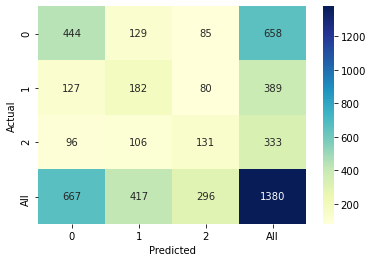

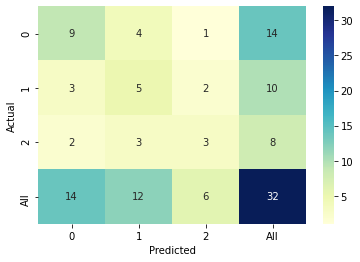

<Figure size 432x288 with 0 Axes>

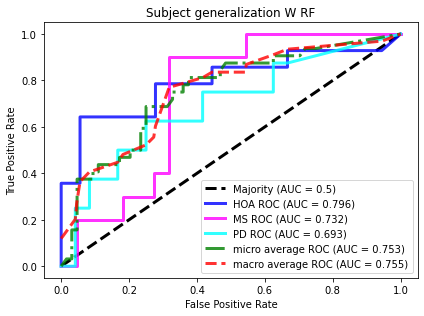

********************************
adaboost
best_params:  {'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 50}

Stride-based model performance (mean):  [0.5358528483435048, 0.5389956843531414, 0.5358528483435048, 0.5885397823382522, [0.685755644596768, 0.42881285230705163, 0.5024185561556049], 0.5077486496810292, 0.5358528483435048, 0.5358528483435048, [0.6465780742032567, 0.42387101110996694, 0.45279686372986405], 0.49716065401617904, 0.5358528483435048, 0.5415700018600142, [0.6580850576772045, 0.4080370989500374, 0.42535980542129537], 0.6870666718306825, 0.692997886033964]

Stride-based model performance (standard deviation):  [0.06075044632047609, 0.06365579178604444, 0.06075044632047609, 0.09799182504405303, [0.1590779759425844, 0.2088811105655184, 0.20618907483267002], 0.06471944861429883, 0.06075044632047609, 0.06075044632047609, [0.11821968880549223, 0.11893976725447204, 0.2597494781721738], 0.03971070132313916, 0.06075044632047609, 0.06277917219638189,

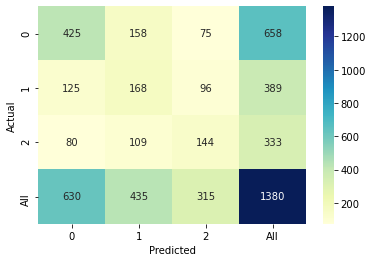

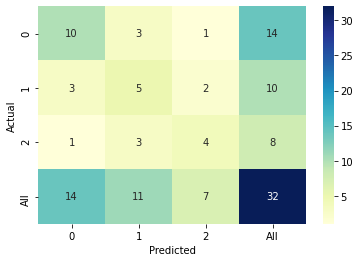

<Figure size 432x288 with 0 Axes>

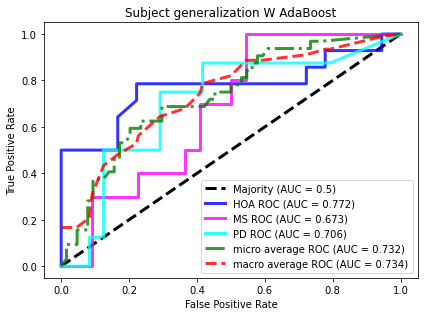

********************************
kernel_svm
best_params:  {'svc__gamma': 0.1}

Stride-based model performance (mean):  [0.49642204815739505, 0.5154243042222719, 0.49642204815739505, 0.5431150040668838, [0.5264861318438905, 0.447405828441973, 0.5723809523809524], 0.40749426874407463, 0.49642204815739505, 0.49642204815739505, [0.8220913415732012, 0.22043146946761405, 0.17995999519140865], 0.3771132383612418, 0.49642204815739505, 0.43939777866357366, [0.6401294635089412, 0.2722702929826517, 0.2189399585921325], 0.7014606866362507, 0.7063651701988558]

Stride-based model performance (standard deviation):  [0.08004063202880629, 0.10525414469676493, 0.08004063202880629, 0.09015133491395298, [0.09130921064097458, 0.34147862898542475, 0.36799619809728873], 0.07402626653020826, 0.08004063202880629, 0.08004063202880629, [0.06716288342302501, 0.08355732865096144, 0.21333894499293535], 0.07862439242843228, 0.0800406320288063, 0.08261287268408873, [0.08629750492460454, 0.10531312594655677, 0.179176

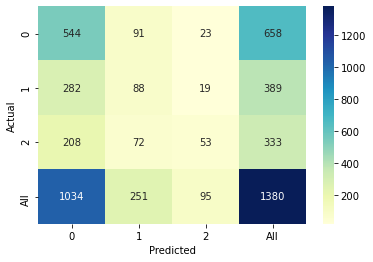

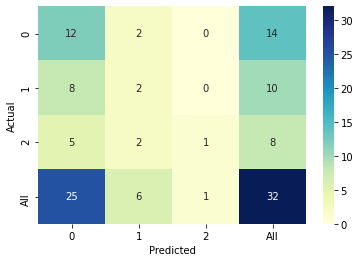

<Figure size 432x288 with 0 Axes>

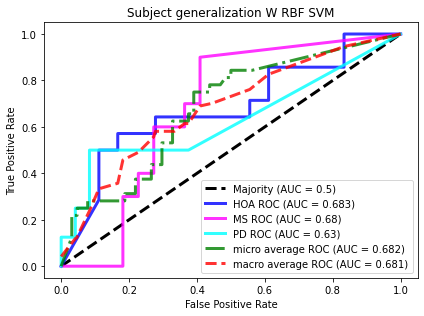

********************************
gbm
best_params:  {'gradientboostingclassifier__learning_rate': 0.15, 'gradientboostingclassifier__max_depth': 7, 'gradientboostingclassifier__max_features': 'sqrt', 'gradientboostingclassifier__min_samples_leaf': 3, 'gradientboostingclassifier__min_samples_split': 2, 'gradientboostingclassifier__n_estimators': 50}

Stride-based model performance (mean):  [0.5498562839251288, 0.5539796521951142, 0.5498562839251288, 0.5971356750369767, [0.6695536837585732, 0.4863990729034977, 0.5059861999232723], 0.5058110764710552, 0.5498562839251288, 0.5498562839251288, [0.7030144831144604, 0.4155963168914976, 0.3988224294072075], 0.5060674757429358, 0.5498562839251288, 0.5542506638480936, [0.6829898217132448, 0.42389343345841085, 0.4113191720571517], 0.6979790018701892, 0.7096502417186625]

Stride-based model performance (standard deviation):  [0.06084400739637988, 0.056725030815132554, 0.06084400739637988, 0.08407589215403453, [0.0895184848747163, 0.2841046957175006,

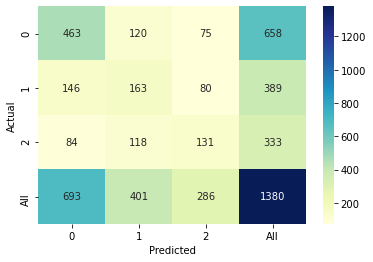

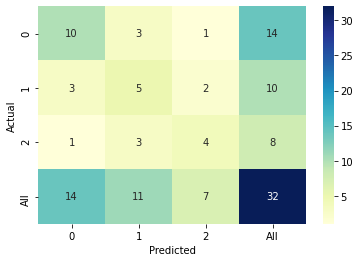

<Figure size 432x288 with 0 Axes>

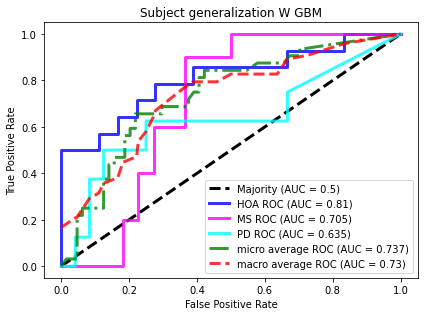

********************************
xgboost
best_params:  {'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__gamma': 0.1, 'xgbclassifier__max_depth': 8, 'xgbclassifier__min_child_weight': 5, 'xgbclassifier__subsample': 1.0}

Stride-based model performance (mean):  [0.5369663301866424, 0.5462328877235774, 0.5369663301866424, 0.5861287662887886, [0.6500606363141648, 0.4686326989480135, 0.5200053279085537], 0.49995616095576134, 0.5369663301866424, 0.5369663301866424, [0.6608458860143411, 0.4200899037746427, 0.4189326930782999], 0.5001575437497785, 0.5369663301866424, 0.5439442096448437, [0.6532028852767678, 0.42315118410811897, 0.4241185618644488], 0.6993264371705075, 0.708801560481654]

Stride-based model performance (standard deviation):  [0.07643054533513532, 0.07908762655448492, 0.07643054533513532, 0.10553408977032232, [0.11380357375986334, 0.319314292623415, 0.20066446134095525], 0.07185564481855715, 0.07643054533513532, 0.07643054533513532, [0.07555874849603325, 0.13538888442439

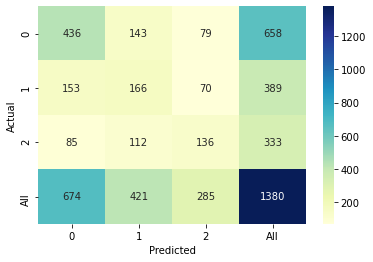

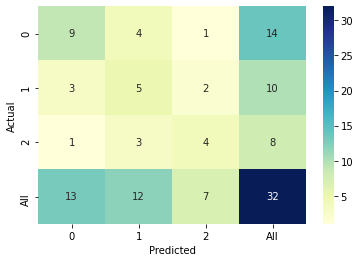

<Figure size 432x288 with 0 Axes>

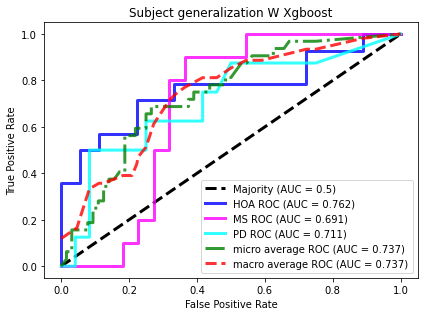

********************************
knn
best_params:  {'kneighborsclassifier__n_neighbors': 4, 'kneighborsclassifier__p': 5}

Stride-based model performance (mean):  [0.5094644718830498, 0.4702585432486862, 0.5094644718830498, 0.5139056446718698, [0.5866472416472417, 0.49743571102798884, 0.32669267707082833], 0.44988679234905077, 0.5094644718830498, 0.5094644718830498, [0.7153824198668542, 0.43504579571848645, 0.19923216146181177], 0.43362913394081815, 0.5094644718830498, 0.4880300920474642, [0.6426068151144122, 0.44794666871589944, 0.21033391799214288], 0.6439185114492681, 0.6487211632562764]

Stride-based model performance (standard deviation):  [0.07889180116770031, 0.09900432885647276, 0.07889180116770031, 0.1119217643118857, [0.1020422657740309, 0.23822687874784107, 0.19935981749181653], 0.0738193753961999, 0.07889180116770031, 0.0788918011677003, [0.07249796498476818, 0.10464711110836195, 0.18738734018039419], 0.0747306460124429, 0.07889180116770031, 0.08937799426150257, [0.08302916

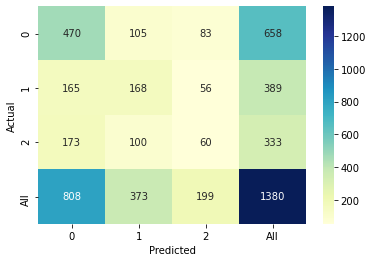

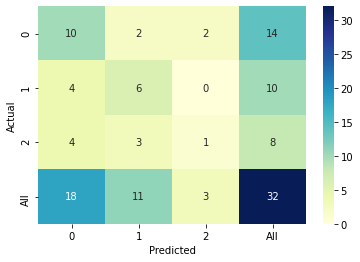

<Figure size 432x288 with 0 Axes>

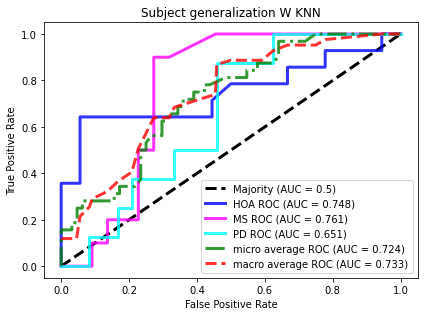

********************************
decision_tree
best_params:  {'decisiontreeclassifier__min_samples_split': 46}

Stride-based model performance (mean):  [0.5573330543510673, 0.5501536333239831, 0.5573330543510673, 0.5850276219562265, [0.6662577252775784, 0.4862459423711642, 0.4979572323232068], 0.5318818157181464, 0.5573330543510673, 0.5573330543510673, [0.651165248991461, 0.5413656334740672, 0.4031145646889109], 0.5174030664415621, 0.5573330543510673, 0.5538348729978553, [0.6572645673027401, 0.4949639257200508, 0.3999807063018955], 0.6911280068245895, 0.6956722258193595]

Stride-based model performance (standard deviation):  [0.07309332791643221, 0.058237559761143635, 0.07309332791643221, 0.0874720404870778, [0.12578967863438317, 0.17321516296121353, 0.11060631738811276], 0.07039235798618439, 0.07309332791643221, 0.07309332791643221, [0.06826936739145326, 0.15696826407343933, 0.24938680374500102], 0.057944210886448286, 0.07309332791643221, 0.07727066343983967, [0.09374261965703427, 0.1

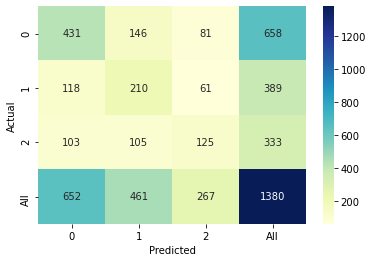

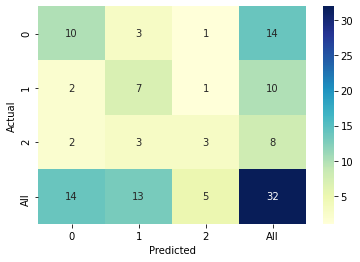

<Figure size 432x288 with 0 Axes>

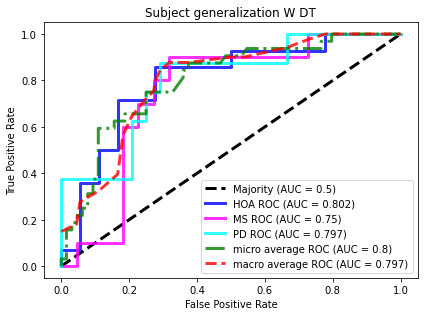

********************************
linear_svm
best_params:  {'svc__gamma': 0.0001}

Stride-based model performance (mean):  [0.5582943947429011, 0.5446776159436463, 0.5582943947429011, 0.585396677266975, [0.6742405713477866, 0.4888680425265791, 0.47092423395657307], 0.5337108428000803, 0.5582943947429011, 0.5582943947429011, [0.6956987088648932, 0.5172188755020081, 0.38821494403333956], 0.5151695985282776, 0.5582943947429011, 0.5495086551088172, [0.6682822887263205, 0.49787160594912605, 0.3793549009093864], 0.718617103182097, 0.7203388612833163]

Stride-based model performance (standard deviation):  [0.04337345522333494, 0.046825398523257636, 0.04337345522333494, 0.07312340252649402, [0.12576047991766667, 0.11803750263694004, 0.12971532923685988], 0.06295721560694037, 0.04337345522333494, 0.04337345522333494, [0.1407925100600955, 0.14022587764511424, 0.20888245472056735], 0.049351554945406724, 0.04337345522333494, 0.056086602771312936, [0.06285480566195613, 0.11470650101179626, 0.0508615

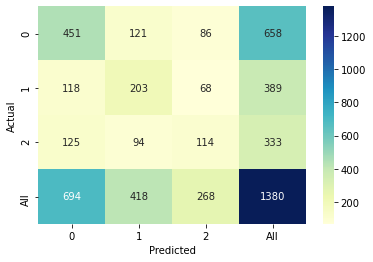

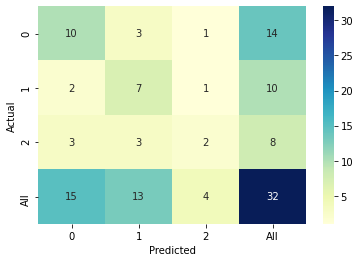

<Figure size 432x288 with 0 Axes>

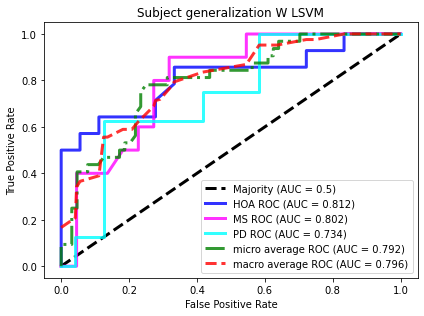

********************************
logistic_regression
best_params:  {'logisticregression__random_state': 0}

Stride-based model performance (mean):  [0.5760363328603486, 0.5650679224223969, 0.5760363328603486, 0.6006781924299356, [0.6803036663836554, 0.5171162464985994, 0.4977838543849356], 0.5576959925750593, 0.5760363328603486, 0.5760363328603486, [0.6749842340792659, 0.562818968180414, 0.4352847754654984], 0.5423077935367829, 0.5760363328603486, 0.5709620105204278, [0.6672558180014271, 0.5347252353250933, 0.42494232728382847], 0.7315887124036977, 0.7309725625480231]

Stride-based model performance (standard deviation):  [0.06792859433283449, 0.06252496193908137, 0.06792859433283449, 0.0755300281424249, [0.10252766223977998, 0.12717696252781582, 0.13676644207533856], 0.06263843981095195, 0.06792859433283449, 0.06792859433283449, [0.16840556420432415, 0.12655152697003114, 0.1732089459910743], 0.054453185854871064, 0.06792859433283449, 0.06447412434398914, [0.10314520210468275, 0.117946

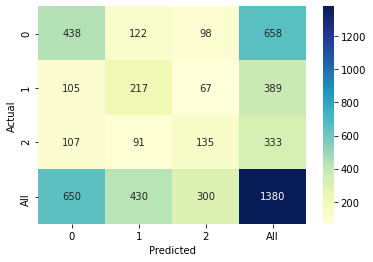

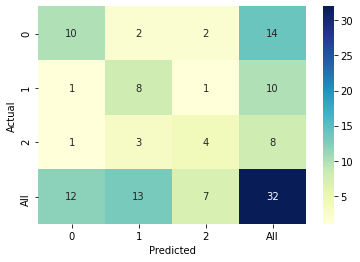

<Figure size 432x288 with 0 Axes>

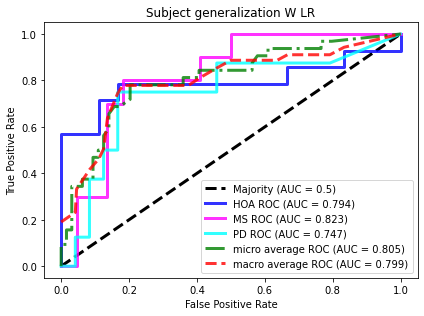

********************************
mlp
best_params:  {'mlpclassifier__hidden_layer_sizes': (5, 5, 5, 5, 50, 30, 5, 50, 10, 100)}

Stride-based model performance (mean):  [0.5411553242507463, 0.5301946088785865, 0.5411553242507463, 0.5761274270865624, [0.701223014294135, 0.44946392761715337, 0.4398968847244709], 0.5283952068698088, 0.5411553242507463, 0.5411553242507463, [0.604028303550209, 0.5050876726278333, 0.4760696444313841], 0.5143422046142742, 0.5411553242507463, 0.5452596536186267, [0.6387809021772762, 0.47273805866468027, 0.4315076530008657], 0.6780730383738532, 0.6875590498229454]

Stride-based model performance (standard deviation):  [0.05207838589132249, 0.04381145278070601, 0.05207838589132249, 0.055161435330397315, [0.08169389333160494, 0.10215365342896374, 0.16515667024057964], 0.04980973361192043, 0.05207838589132249, 0.05207838589132249, [0.13929103320663475, 0.07198037689720231, 0.22919699340088187], 0.049631784100820434, 0.05207838589132249, 0.04674780807780444, [0.0872

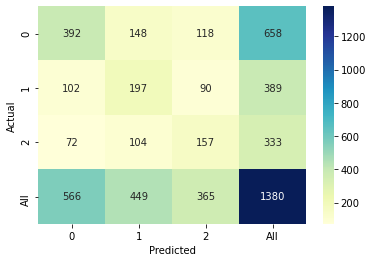

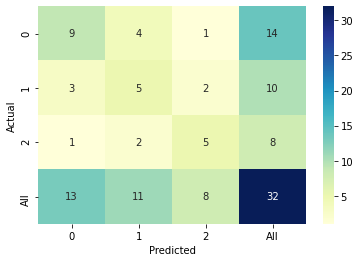

<Figure size 432x288 with 0 Axes>

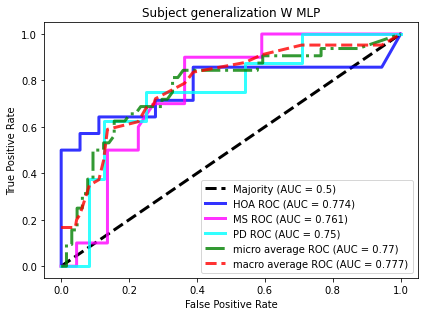

********************************


In [13]:
ml_models = ['random_forest', 'adaboost', 'kernel_svm', 'gbm', 'xgboost', 'knn', 'decision_tree',  'linear_svm', 
             'logistic_regression', 'mlp']
# ml_models = ['logistic_regression']
metrics = run_ml_models(ml_models, X, Y, framework, results_path, save_results)

In [14]:
metrics

random_forest  \
stride_accuracy_mean                                                       0.549734   
stride_precision_macro_mean                                                0.553475   
stride_precision_micro_mean                                                0.549734   
stride_precision_weighted_mean                                             0.594883   
stride_precision_class_wise_mean  [0.673707083750548, 0.49507817385866165, 0.491...   
stride_recall_macro_mean                                                   0.518566   
stride_recall_micro_mean                                                   0.549734   
stride_recall_weighted_mean                                                0.549734   
stride_recall_class_wise_mean     [0.671680805597111, 0.46412893740202976, 0.419...   
stride_F1_macro_mean                                                       0.508122   
stride_F1_micro_mean                                                       0.549734   
stride_F1_weighted_mean                                                    0.550667   
stride_F1_class_wise_mean         [0.6688824268140944, 0.4558669041583219, 0.399...   
stride_AUC_macro_mean                                                      0.712952   
stride_AUC_weighted_mean                                                   0.719149   
stride_accuracy_std                                                        0.064869   
stride_precision_macro_std                                                 0.070972   
stride_precision_micro_std                                                 0.064869   
stride_precision_weighted_std                                              0.102541   
stride_precision_class_wise_std   [0.13394638320297558, 0.23531336221137678, 0.1...   
stride_recall_macro_std                                                    0.062748   
stride_recall_micro_std                                                    0.064869   
stride_recall_weighted_std                                                 0.064869   
stride_recall_class_wise_std      [0.07440398918548102, 0.09339892193923427, 0.2...   
stride_F1_macro_std                                                        0.049571   
stride_F1_micro_std                                                        0.064869   
stride_F1_weighted_std                                                     0.071238   
stride_F1_class_wise_std          [0.08658355453322472, 0.10420796089655553, 0.0...   
stride_AUC_macro_std                                                       0.062532   
stride_AUC_weighted_std                                                    0.064403   
person_accuracy_mean                                                       0.533333   
person_precision_macro_mean                                                0.511111   
person_precision_micro_mean                                                0.533333   
person_precision_weighted_mean                                             0.627778   
person_precision_class_wise_mean                     [0.6333333333333333, 0.5, 0.4]   
person_recall_macro_mean                                                   0.500000   
person_recall_micro_mean                                                   0.533333   
person_recall_weighted_mean                                                0.533333   
person_recall_class_wise_mean     [0.6666666666666666, 0.4666666666666667, 0.366...   
person_F1_macro_mean                                                       0.475873   
person_F1_micro_mean                                                       0.533333   
person_F1_weighted_mean                                                    0.548957   
person_F1_class_wise_mean                            [0.6333333333333333, 0.5, 0.4]   
person_AUC_macro_mean                                                      0.758333   
person_AUC_weighted_mean                                                   0.759524   
person_accuracy_std                                                 

### Subject generalization framework 2: walking while talking (WT) to classify strides and subjects of HOA/MS/PD

In [15]:
#Trial WT for the second framework of subject generalization
trialWT = data[data['scenario']=='WT']
print ('Original number of subjects in trial WT for cross validation:', len(trialWT['PID'].unique()))
print ('Number of subjects in trial WT in each cohort:\n', trialWT.groupby('PID').first()['cohort'].value_counts())

cols_to_drop = ['PID', 'key', 'cohort', 'trial', 'scenario', 'video', 'stride_number', 'label']
#Shuffling the cross validation stride data
trialWT = shuffle(trialWT, random_state = 0)
#CV for people generalize so no train-test split
X_WT = trialWT.drop(cols_to_drop, axis = 1)
Y_WT = trialWT[['PID', 'label']]

#Total strides and imbalance of labels in the training and testing set
#Training set 
print('Strides in trial WT for cross validation: ', len(trialWT))
print ('HOA, MS and PD strides in trial WT:\n', trialWT['cohort'].value_counts())
print ('Imbalance ratio in trial WT (controls:MS:PD)= 1:X:Y\n', trialWT['cohort'].value_counts()/trialWT['cohort'].value_counts()['HOA'])
#Defining the framework of interest
framework = 'WT'

Original number of subjects in trial WT for cross validation: 26
Number of subjects in trial WT in each cohort:
 PD     9
MS     9
HOA    8
Name: cohort, dtype: int64
Strides in trial WT for cross validation:  1050
HOA, MS and PD strides in trial WT:
 PD     367
HOA    351
MS     332
Name: cohort, dtype: int64
Imbalance ratio in trial WT (controls:MS:PD)= 1:X:Y
 PD     1.045584
HOA    1.000000
MS     0.945869
Name: cohort, dtype: float64


random_forest
best_params:  {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': None, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__n_estimators': 50}

Stride-based model performance (mean):  [0.5141747646111263, 0.5323057302387744, 0.5141747646111263, 0.558845903737138, [0.3765562943062295, 0.5161030901722391, 0.7042578062378545], 0.5082951920209708, 0.5141747646111263, 0.5141747646111263, [0.42043162427548547, 0.4970382864007472, 0.6074156653866799], 0.48925363893782825, 0.5141747646111263, 0.5034000208099986, [0.3848279864279864, 0.49077779712194225, 0.5921551332635561], 0.7072523170726892, 0.7140903479822173]

Stride-based model performance (standard deviation):  [0.1191962160192203, 0.1118383670026808, 0.1191962160192203, 0.08910289346049392, [0.34883956004447025, 0.1554559057509974, 0.15708193472648474], 0.12505330868647188, 0.1191962160192203, 0.1191962160192203, [0.380190

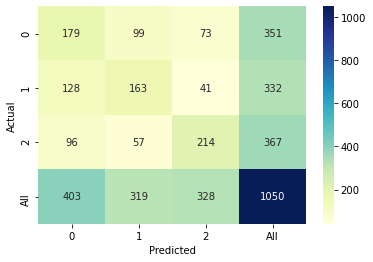

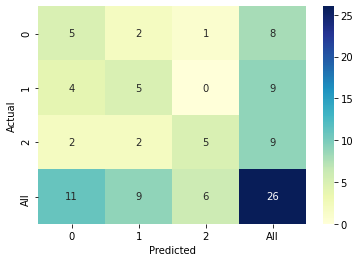

<Figure size 432x288 with 0 Axes>

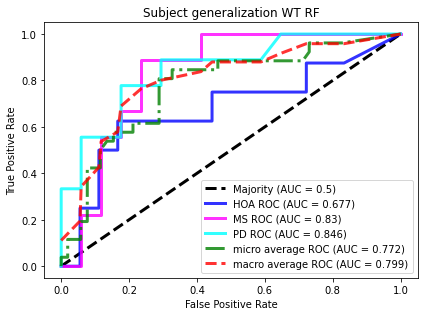

********************************
adaboost
best_params:  {'adaboostclassifier__learning_rate': 0.1, 'adaboostclassifier__n_estimators': 150}

Stride-based model performance (mean):  [0.5064635622207836, 0.5524463076444189, 0.5064635622207836, 0.579676624196086, [0.41312821305210506, 0.5618216433060388, 0.6823890665751131], 0.5094112242581235, 0.5064635622207836, 0.5064635622207836, [0.5156532358136375, 0.399380057093686, 0.6132003798670466], 0.4754837272341879, 0.5064635622207836, 0.4831217028684461, [0.445133984516786, 0.42907082521117607, 0.5522463719746018], 0.697463429621961, 0.701742396248439]

Stride-based model performance (standard deviation):  [0.10327455595063276, 0.07774495828878238, 0.10327455595063276, 0.0741238856944464, [0.2946227296624561, 0.26838024620200257, 0.18888985175256573], 0.100954299318605, 0.10327455595063276, 0.10327455595063276, [0.30263159208188917, 0.21795342968823161, 0.3440873943520847], 0.12483688906555025, 0.10327455595063276, 0.1238433552097782, [0.27

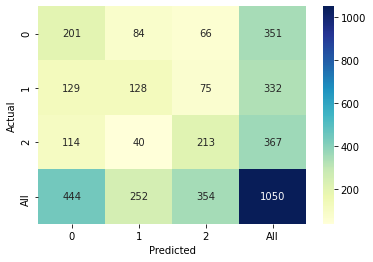

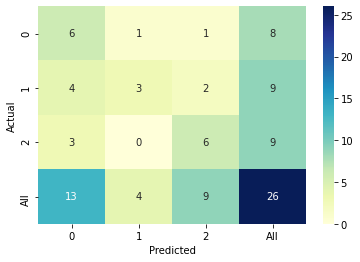

<Figure size 432x288 with 0 Axes>

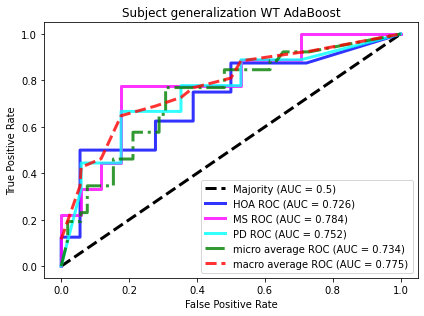

********************************
kernel_svm
best_params:  {'svc__gamma': 0.0001}

Stride-based model performance (mean):  [0.49617817115525015, 0.477031103567563, 0.49617817115525015, 0.5011753761227415, [0.46977822890553184, 0.24310537204639932, 0.7182097097507579], 0.4991716869331996, 0.49617817115525015, 0.49617817115525015, [0.41880601320369387, 0.3032104720973295, 0.7754985754985755], 0.4602420187267837, 0.49617817115525015, 0.46942493567830884, [0.4323470486971764, 0.2618168959753119, 0.6865621115078631], 0.7283784727079992, 0.7374105246842302]

Stride-based model performance (standard deviation):  [0.15570839535729147, 0.20078985102867236, 0.15570839535729147, 0.21112607270838418, [0.3681079336758883, 0.21952564697460308, 0.2355541673479314], 0.1521201563793403, 0.15570839535729147, 0.15570839535729147, [0.26944897828189723, 0.3393350131493163, 0.23777522817319993], 0.17962300075632012, 0.15570839535729147, 0.18215430869140728, [0.3117838074620961, 0.26963400048696423, 0.0871968

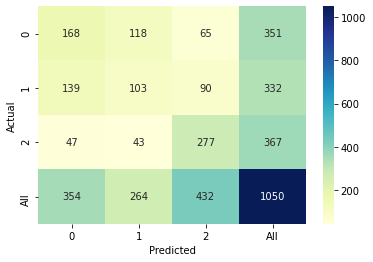

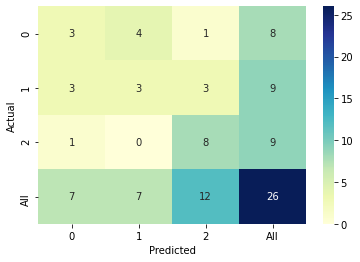

<Figure size 432x288 with 0 Axes>

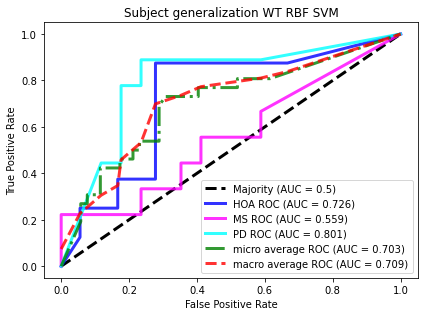

********************************
gbm
best_params:  {'gradientboostingclassifier__learning_rate': 0.05, 'gradientboostingclassifier__max_depth': 4, 'gradientboostingclassifier__max_features': 'auto', 'gradientboostingclassifier__min_samples_leaf': 3, 'gradientboostingclassifier__min_samples_split': 2, 'gradientboostingclassifier__n_estimators': 100}

Stride-based model performance (mean):  [0.5142826454986194, 0.537226372245214, 0.5142826454986194, 0.5661693323547693, [0.4018162352792997, 0.5159774212715389, 0.6938854601848029], 0.5089046291027417, 0.5142826454986194, 0.5142826454986194, [0.43544570814264283, 0.49872926343826074, 0.5925389157273215], 0.486435280102956, 0.5142826454986194, 0.5009522344047335, [0.406165815205033, 0.4940337429148463, 0.559106282188989], 0.7070594036871027, 0.7127849942529105]

Stride-based model performance (standard deviation):  [0.14234084686019782, 0.1184509729459612, 0.14234084686019782, 0.09230514588868753, [0.3559825286230248, 0.21112186430493904, 0.

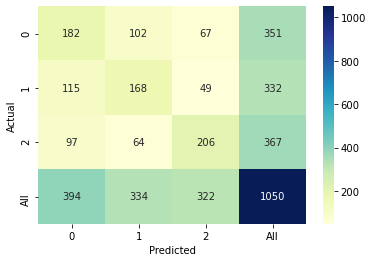

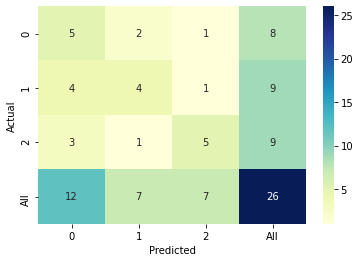

<Figure size 432x288 with 0 Axes>

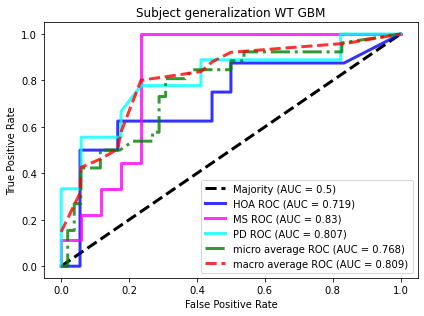

********************************
xgboost
best_params:  {'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__gamma': 0.5, 'xgbclassifier__max_depth': 5, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__subsample': 1.0}

Stride-based model performance (mean):  [0.5176320803526198, 0.531855071585316, 0.5176320803526198, 0.5615986102919248, [0.39753781102618313, 0.5203059878851114, 0.6777214158446535], 0.5115814113149652, 0.5176320803526198, 0.5176320803526198, [0.44419578272200155, 0.5080966571768968, 0.5824517940459969], 0.4871436567073199, 0.5176320803526198, 0.5023024841306696, [0.40753227810216447, 0.4999791877995033, 0.5539195042202921], 0.7143754999108299, 0.7203176384311718]

Stride-based model performance (standard deviation):  [0.13454308182369118, 0.10716742620024983, 0.13454308182369118, 0.08151356825357459, [0.3431309988502672, 0.2400045863026651, 0.13925094008594907], 0.1382182532311063, 0.13454308182369118, 0.13454308182369118, [0.35719476499890684, 0.22586228505235

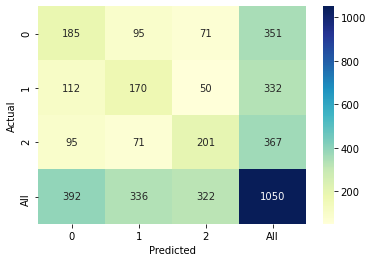

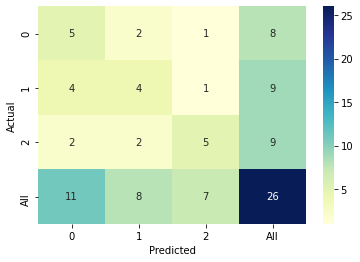

<Figure size 432x288 with 0 Axes>

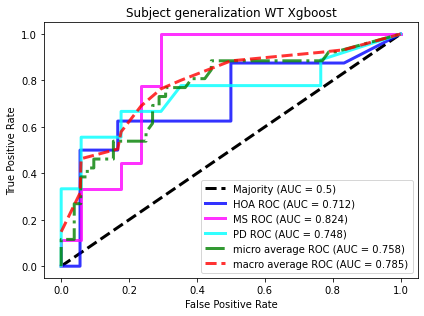

********************************
knn
best_params:  {'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__p': 4}

Stride-based model performance (mean):  [0.4788642281510783, 0.522611598585406, 0.4788642281510783, 0.554818486210365, [0.38619859028985704, 0.5380647697675561, 0.6435714356988048], 0.48328861442129617, 0.4788642281510783, 0.4788642281510783, [0.4395323012097456, 0.4399631716837727, 0.5703703703703703], 0.4576423618198631, 0.4788642281510783, 0.46387280108251616, [0.4083902583247284, 0.4428539455578673, 0.5216828815769937], 0.6969814382198064, 0.7029943982850514]

Stride-based model performance (standard deviation):  [0.14430489989117284, 0.09374872846066949, 0.14430489989117284, 0.06969424414993569, [0.3157752761050398, 0.2868156500228237, 0.16607037998970922], 0.1351136597048831, 0.14430489989117284, 0.14430489989117284, [0.3363200824906603, 0.11473172721900482, 0.3545381534341715], 0.14865842733439116, 0.14430489989117284, 0.14784983086313414, [0.32176432361100

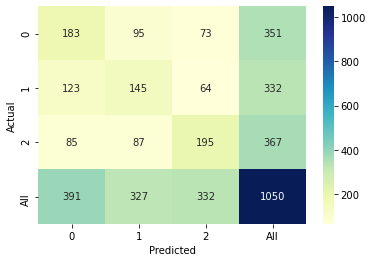

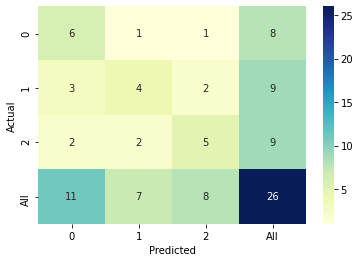

<Figure size 432x288 with 0 Axes>

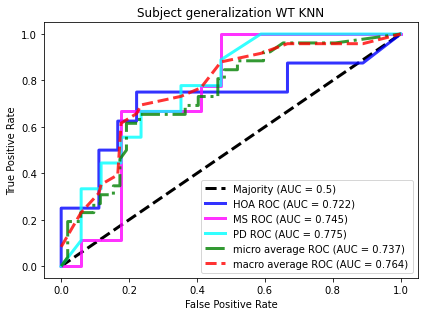

********************************
decision_tree
best_params:  {'decisiontreeclassifier__min_samples_split': 6}

Stride-based model performance (mean):  [0.5164015752607785, 0.5249210889140816, 0.5164015752607785, 0.5442948993107437, [0.41051639028577375, 0.5110038551100015, 0.6532430213464696], 0.521058579499919, 0.5164015752607785, 0.5164015752607785, [0.45471320904298146, 0.5310563607462588, 0.5774061687105165], 0.5011933019564465, 0.5164015752607785, 0.5062018628576379, [0.422265497518949, 0.5073727039865596, 0.5739417043638313], 0.6425338554988935, 0.6437836442921945]

Stride-based model performance (standard deviation):  [0.0684344063486107, 0.07660900096038818, 0.0684344063486107, 0.06353122575749283, [0.24110979383796588, 0.1386152935737419, 0.12179737927097543], 0.05876978720539684, 0.0684344063486107, 0.0684344063486107, [0.262337518077636, 0.12188174629025247, 0.22067884792526601], 0.08058636208142962, 0.0684344063486107, 0.07750073444515407, [0.2390395570729265, 0.09451744735

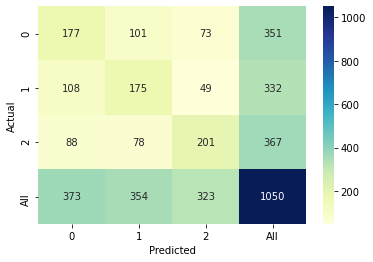

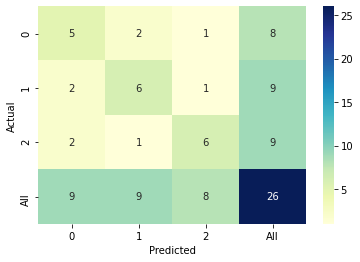

<Figure size 432x288 with 0 Axes>

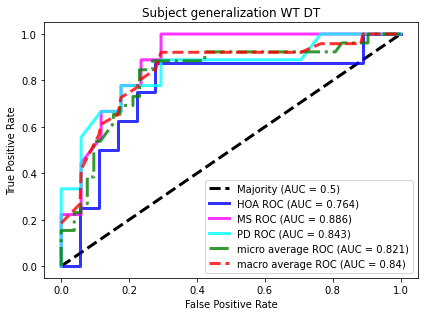

********************************
linear_svm
best_params:  {'svc__gamma': 0.0001}

Stride-based model performance (mean):  [0.4896162762167737, 0.5138569087889214, 0.4896162762167737, 0.5427491324217381, [0.35583662311185243, 0.5429976410185249, 0.6427364622363869], 0.4883606416085874, 0.4896162762167737, 0.4896162762167737, [0.4303500631940328, 0.47628601333080833, 0.5584458483009208], 0.46848310170922736, 0.4896162762167737, 0.4803105732307166, [0.3891046317236132, 0.48157301544572156, 0.534771657958347], 0.6733183885054773, 0.6801122684422705]

Stride-based model performance (standard deviation):  [0.1220917094334068, 0.09232474386656259, 0.1220917094334068, 0.06597606480112285, [0.3032380668105511, 0.23962285260772287, 0.14684369701507827], 0.12162261555084795, 0.1220917094334068, 0.1220917094334068, [0.3579245885119649, 0.10978863493493336, 0.29883544592833117], 0.12436578547947649, 0.1220917094334068, 0.1145829458528532, [0.3283777165099503, 0.10075223373957659, 0.1396620172151676

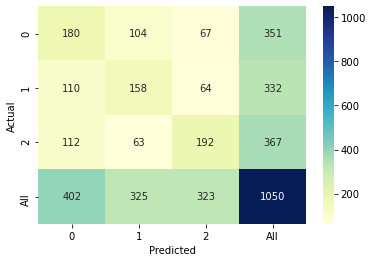

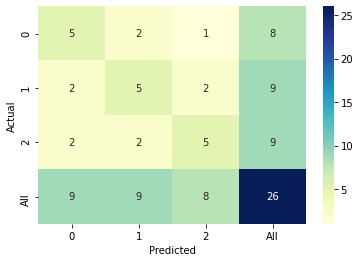

<Figure size 432x288 with 0 Axes>

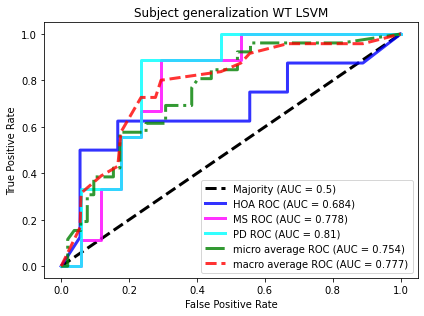

********************************
logistic_regression
best_params:  {'logisticregression__random_state': 0}

Stride-based model performance (mean):  [0.4542060184776034, 0.47377625987048927, 0.4542060184776034, 0.5008601759566905, [0.3640386005956086, 0.4697633859569174, 0.5875267930589418], 0.4513725208833039, 0.4542060184776034, 0.4542060184776034, [0.39829894745945754, 0.40893806686063056, 0.5468805483298237], 0.43447038284984424, 0.4542060184776034, 0.4473048217077518, [0.3794734700049103, 0.41191376574145566, 0.5120239128031666], 0.6386413091818385, 0.6455245388550115]

Stride-based model performance (standard deviation):  [0.11621760123226897, 0.0947026568160367, 0.11621760123226897, 0.07467258533404032, [0.3276151426833599, 0.2552059388619859, 0.10611508403880837], 0.11776872762939984, 0.11621760123226897, 0.11621760123226897, [0.34221256410759604, 0.09186750762686095, 0.285571030013136], 0.11841678677564109, 0.11621760123226897, 0.11002597721996596, [0.33395907564422705, 0.10961

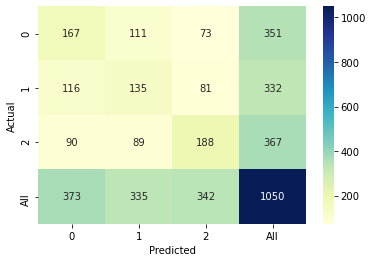

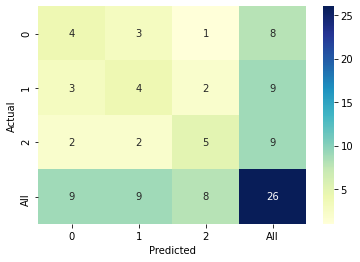

<Figure size 432x288 with 0 Axes>

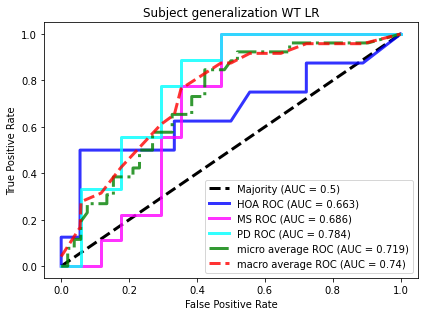

********************************
mlp
best_params:  {'mlpclassifier__hidden_layer_sizes': (50, 50, 50, 50, 30, 150, 100, 20, 100)}

Stride-based model performance (mean):  [0.546445722127338, 0.5567029909396514, 0.546445722127338, 0.5811757446695879, [0.40985042642389113, 0.6067960590898901, 0.6534624873051729], 0.5471344994864975, 0.546445722127338, 0.546445722127338, [0.4857065716867744, 0.5421166798591378, 0.6135802469135803], 0.5234006356513725, 0.546445722127338, 0.531817407694632, [0.4431695714291308, 0.5537384267693879, 0.5732939087555987], 0.734388585848051, 0.7382528700689852]

Stride-based model performance (standard deviation):  [0.1700430857464656, 0.14630977717228721, 0.1700430857464656, 0.12145784382420528, [0.3482212789153488, 0.24647338356879547, 0.14079969515167648], 0.16012886491404463, 0.1700430857464656, 0.1700430857464656, [0.4083658169428244, 0.03160209424976235, 0.3302209520198151], 0.17540957192068468, 0.1700430857464656, 0.17405464667548437, [0.3734894615596062,

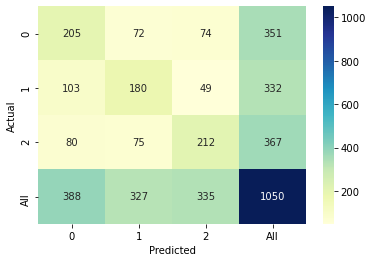

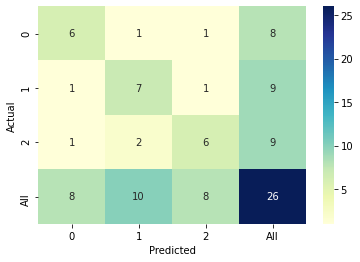

<Figure size 432x288 with 0 Axes>

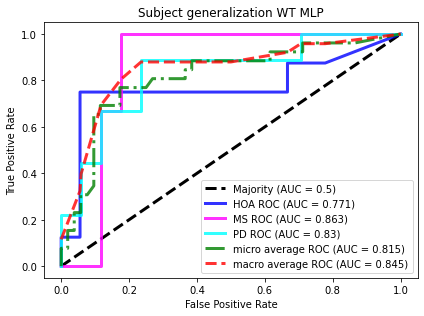

********************************


In [16]:
ml_models = ['random_forest', 'adaboost', 'kernel_svm', 'gbm', 'xgboost', 'knn', 'decision_tree',  'linear_svm', 
             'logistic_regression', 'mlp']
metrics_WT = run_ml_models(ml_models, X_WT, Y_WT, framework, results_path, save_results)

In [17]:
metrics_WT

random_forest  \
stride_accuracy_mean                                                       0.514175   
stride_precision_macro_mean                                                0.532306   
stride_precision_micro_mean                                                0.514175   
stride_precision_weighted_mean                                             0.558846   
stride_precision_class_wise_mean  [0.3765562943062295, 0.5161030901722391, 0.704...   
stride_recall_macro_mean                                                   0.508295   
stride_recall_micro_mean                                                   0.514175   
stride_recall_weighted_mean                                                0.514175   
stride_recall_class_wise_mean     [0.42043162427548547, 0.4970382864007472, 0.60...   
stride_F1_macro_mean                                                       0.489254   
stride_F1_micro_mean                                                       0.514175   
stride_F1_weighted_mean                                                    0.503400   
stride_F1_class_wise_mean         [0.3848279864279864, 0.49077779712194225, 0.59...   
stride_AUC_macro_mean                                                      0.707252   
stride_AUC_weighted_mean                                                   0.714090   
stride_accuracy_std                                                        0.119196   
stride_precision_macro_std                                                 0.111838   
stride_precision_micro_std                                                 0.119196   
stride_precision_weighted_std                                              0.089103   
stride_precision_class_wise_std   [0.34883956004447025, 0.1554559057509974, 0.15...   
stride_recall_macro_std                                                    0.125053   
stride_recall_micro_std                                                    0.119196   
stride_recall_weighted_std                                                 0.119196   
stride_recall_class_wise_std      [0.3801908828251226, 0.19032661736801243, 0.27...   
stride_F1_macro_std                                                        0.129899   
stride_F1_micro_std                                                        0.119196   
stride_F1_weighted_std                                                     0.117881   
stride_F1_class_wise_std          [0.3391224625887254, 0.13816106812214018, 0.13...   
stride_AUC_macro_std                                                       0.128026   
stride_AUC_weighted_std                                                    0.117491   
person_accuracy_mean                                                       0.566667   
person_precision_macro_mean                                                0.566667   
person_precision_micro_mean                                                0.566667   
person_precision_weighted_mean                                             0.733333   
person_precision_class_wise_mean                                    [0.5, 0.6, 0.6]   
person_recall_macro_mean                                                   0.537778   
person_recall_micro_mean                                                   0.566667   
person_recall_weighted_mean                                                0.566667   
person_recall_class_wise_mean                       [0.38, 0.5333333333333333, 0.7]   
person_F1_macro_mean                                                       0.513651   
person_F1_micro_mean                                                       0.566667   
person_F1_weighted_mean                                                    0.597460   
person_F1_class_wise_mean                                           [0.5, 0.6, 0.6]   
person_AUC_macro_mean                                                      0.800000   
person_AUC_weighted_mean                                                   0.811458   
person_accuracy_std                                                 

### Subject generalization framework 3: virtual beam walking (VBW) to classify strides and subjects of HOA/MS/PD

In [18]:
#Trial VBW for the third framework of subject generalization
trialVBW = data[data['scenario']=='SLW']
print ('Original number of subjects in trial VBW for cross validation:', len(trialVBW['PID'].unique()))
print ('Number of subjects in trial VBW in each cohort:\n', trialVBW.groupby('PID').first()['cohort'].value_counts())

cols_to_drop = ['PID', 'key', 'cohort', 'trial', 'scenario', 'video', 'stride_number', 'label']
#Shuffling the cross validation stride data
trialVBW = shuffle(trialVBW, random_state = 0)
#CV for people generalize so no train-test split
X_VBW = trialVBW.drop(cols_to_drop, axis = 1)
Y_VBW = trialVBW[['PID', 'label']]

#Total strides and imbalance of labels in the training and testing set
#Training set 
print('Strides in trial VBW for cross validation: ', len(trialVBW))
print ('HOA, MS and PD strides in trial VBW:\n', trialVBW['cohort'].value_counts())
print ('Imbalance ratio in trial VBW (controls:MS:PD)= 1:X:Y\n', trialVBW['cohort'].value_counts()/trialVBW['cohort'].value_counts()['HOA'])
#Defining the framework of interest
framework = 'VBW'

Original number of subjects in trial VBW for cross validation: 22
Number of subjects in trial VBW in each cohort:
 HOA    8
MS     8
PD     6
Name: cohort, dtype: int64
Strides in trial VBW for cross validation:  829
HOA, MS and PD strides in trial VBW:
 HOA    336
MS     283
PD     210
Name: cohort, dtype: int64
Imbalance ratio in trial VBW (controls:MS:PD)= 1:X:Y
 HOA    1.000000
MS     0.842262
PD     0.625000
Name: cohort, dtype: float64


random_forest
best_params:  {'randomforestclassifier__class_weight': None, 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 40}

Stride-based model performance (mean):  [0.41581688880505574, 0.4096487592274466, 0.41581688880505574, 0.4305727151491071, [0.6105031056011448, 0.26361110759395795, 0.3548320644872369], 0.3845414196488458, 0.41581688880505574, 0.41581688880505574, [0.6444337090713902, 0.3717522775731731, 0.13743827230197386], 0.37103236332270983, 0.41581688880505574, 0.40011103097776246, [0.6134070800677596, 0.3058701267495645, 0.1938198831508054], 0.5791542920176436, 0.5828000231518873]

Stride-based model performance (standard deviation):  [0.07678068642471493, 0.0855531627747108, 0.07678068642471493, 0.07393244558589758, [0.10328045236081704, 0.1291290788155685, 0.3184872969978939], 0.07979076419531261, 0.07678068642471493, 0.07678068642471493, [0.

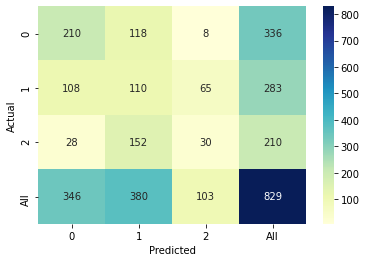

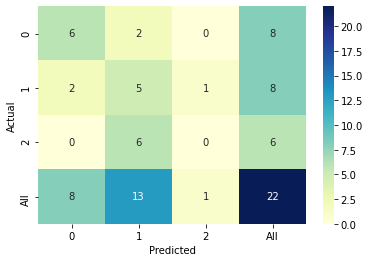

<Figure size 432x288 with 0 Axes>

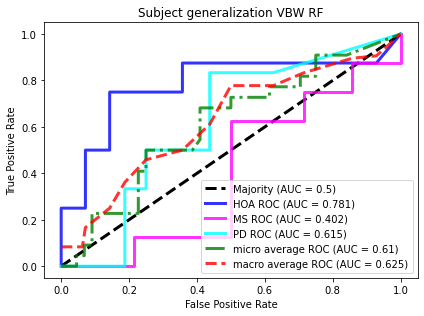

********************************
adaboost
best_params:  {'adaboostclassifier__learning_rate': 0.1, 'adaboostclassifier__n_estimators': 50}

Stride-based model performance (mean):  [0.41752037001312015, 0.3551528114673704, 0.41752037001312015, 0.3800770044608199, [0.5573138503154905, 0.18451419215029008, 0.3236303919363304], 0.3801387620355389, 0.41752037001312015, 0.41752037001312015, [0.7268910621473365, 0.192157394843962, 0.22136782911531835], 0.3545241176080899, 0.41752037001312015, 0.3866890508065303, [0.6232723456232327, 0.18403551444741376, 0.2562644927536232], 0.5410717687524988, 0.5452650419341133]

Stride-based model performance (standard deviation):  [0.06421365672504908, 0.06329708780808428, 0.06421365672504908, 0.044062333397842976, [0.08999565856330087, 0.13674439762358198, 0.3669444199347294], 0.08652371903080858, 0.06421365672504908, 0.06421365672504908, [0.15407418521935523, 0.14654669119532973, 0.30403326598857566], 0.0692116112090394, 0.0642136567250491, 0.04950123689

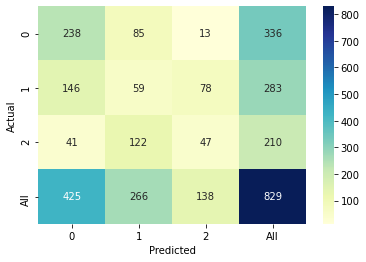

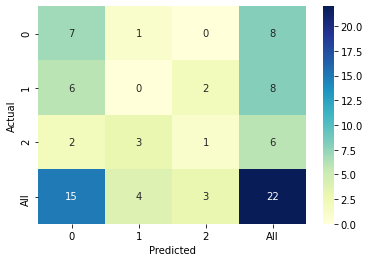

<Figure size 432x288 with 0 Axes>

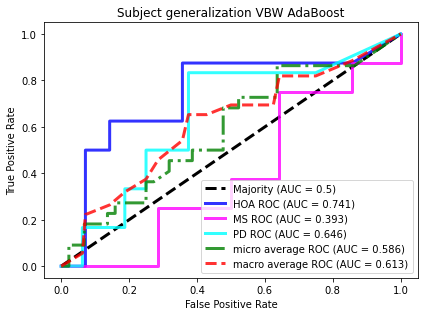

********************************
kernel_svm
best_params:  {'svc__gamma': 1}

Stride-based model performance (mean):  [0.39863189492674633, 0.13287729830891543, 0.39863189492674633, 0.16109105076842317, [0.39863189492674633, 0.0, 0.0], 0.3333333333333333, 0.39863189492674633, 0.39863189492674633, [1.0, 0.0, 0.0], 0.18947538523243493, 0.39863189492674633, 0.22883763415618782, [0.5684261556973047, 0.0, 0.0], 0.4388773365864429, 0.44100601966673514]

Stride-based model performance (standard deviation):  [0.04672968131214522, 0.015576560437381747, 0.04672968131214522, 0.03702113646679708, [0.05224537199042915, 0.0, 0.0], 0.0, 0.04672968131214522, 0.04672968131214522, [0.0, 0.0, 0.0], 0.01601607018712515, 0.04672968131214522, 0.045430481636307196, [0.05371953250622941, 0.0, 0.0], 0.06652802021412955, 0.07090109418247749]

Person-based model performance (mean):  [0.36, 0.3333333333333333, 0.36, 1.0, [1.0, 0.0, 0.0], 0.11999999999999997, 0.36, 0.36, [0.36, 0.0, 0.0], 0.17619047619047618, 0.36,

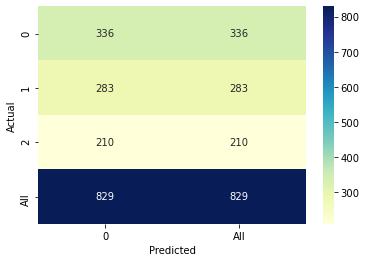

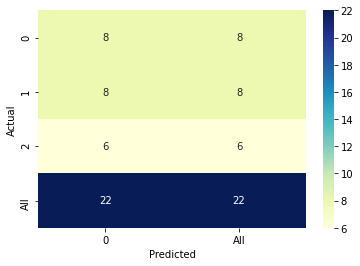

<Figure size 432x288 with 0 Axes>

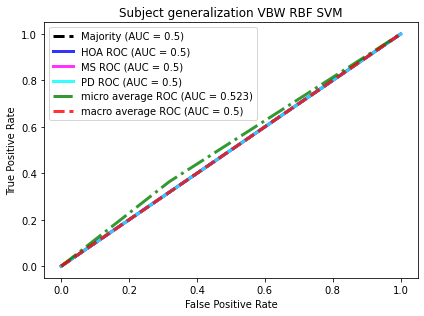

********************************
gbm
best_params:  {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 2, 'gradientboostingclassifier__max_features': 'auto', 'gradientboostingclassifier__min_samples_leaf': 1, 'gradientboostingclassifier__min_samples_split': 2, 'gradientboostingclassifier__n_estimators': 150}

Stride-based model performance (mean):  [0.42513800442987854, 0.40589159249224077, 0.42513800442987854, 0.42987114984815067, [0.5501663599683049, 0.3114478114478114, 0.3560606060606061], 0.38945868247261267, 0.42513800442987854, 0.42513800442987854, [0.6762313603812367, 0.3639708922917878, 0.12817379474481339], 0.3670902108997042, 0.42513800442987854, 0.3985280037512779, [0.593630309810168, 0.33071936543968544, 0.17692095744925934], 0.5746917044262774, 0.5813205775153236]

Stride-based model performance (standard deviation):  [0.041665064223364696, 0.07400239429164239, 0.041665064223364696, 0.050681672643123926, [0.07771728579631569, 0.11596

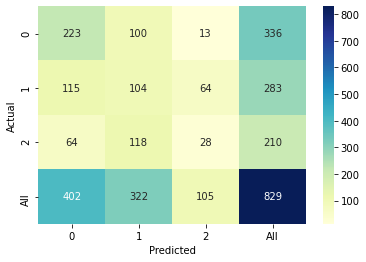

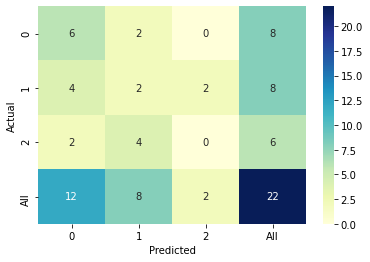

<Figure size 432x288 with 0 Axes>

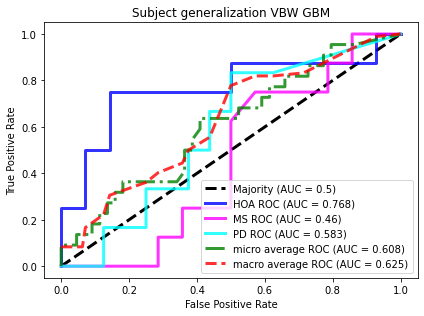

********************************
xgboost
best_params:  {'xgbclassifier__colsample_bytree': 1.0, 'xgbclassifier__gamma': 1, 'xgbclassifier__max_depth': 5, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__subsample': 0.6}

Stride-based model performance (mean):  [0.4184215733593971, 0.3755748759589092, 0.4184215733593971, 0.4065006329947297, [0.5927553912169442, 0.2615192465627345, 0.2724499900970489], 0.3825797584078009, 0.4184215733593971, 0.4184215733593971, [0.6572556720736289, 0.3523652839697616, 0.13811831918001213], 0.3626385074907232, 0.4184215733593971, 0.39629532275584956, [0.610110432614076, 0.29700047987850847, 0.18080460997958506], 0.5790018067606617, 0.5846258374097968]

Stride-based model performance (standard deviation):  [0.04365977309683489, 0.06780795830143135, 0.04365977309683489, 0.04316300229093779, [0.09203942884649174, 0.14766398973986594, 0.3243049892988058], 0.0576004940249838, 0.04365977309683489, 0.04365977309683489, [0.15146267490109447, 0.22816188654325

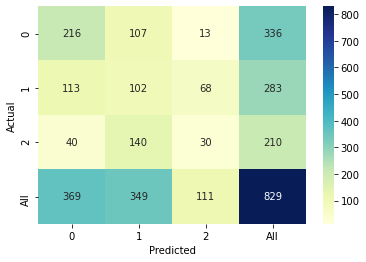

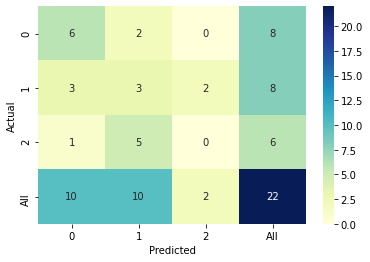

<Figure size 432x288 with 0 Axes>

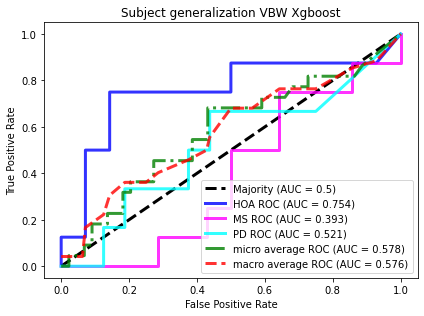

********************************
knn
best_params:  {'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__p': 1}

Stride-based model performance (mean):  [0.447993140456911, 0.428830105419869, 0.447993140456911, 0.4301909014533318, [0.4804353559531101, 0.3406245573760938, 0.46543040293040294], 0.4259250686845382, 0.447993140456911, 0.447993140456911, [0.6870835133472107, 0.3228044840731408, 0.26788720863326315], 0.40587195079373134, 0.447993140456911, 0.41898838175072833, [0.5593390046806196, 0.32427435240314556, 0.3340024952974291], 0.5735273546563624, 0.5718289830972193]

Stride-based model performance (standard deviation):  [0.10792865574027499, 0.12093547370775326, 0.10792865574027499, 0.10590215908532766, [0.09736721757528016, 0.18970006125266653, 0.39746148066745396], 0.11432285930480507, 0.10792865574027499, 0.10792865574027499, [0.24058181185165783, 0.21992536681224026, 0.2871824619395004], 0.10133893836870406, 0.10792865574027499, 0.09155659954802739, [0.148092536262

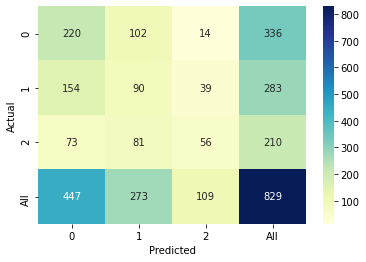

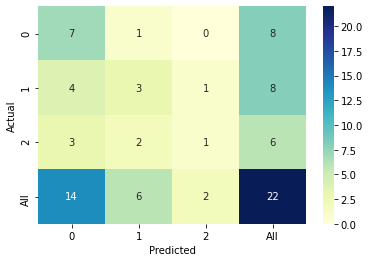

<Figure size 432x288 with 0 Axes>

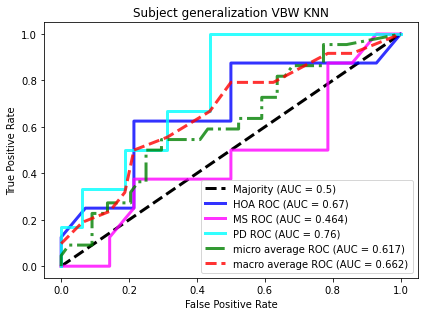

********************************
decision_tree
best_params:  {'decisiontreeclassifier__min_samples_split': 33}

Stride-based model performance (mean):  [0.44259333225346087, 0.4113902936832374, 0.44259333225346087, 0.4308640085719966, [0.5423681051157206, 0.3978529237968187, 0.29394985213717295], 0.4349824233321041, 0.44259333225346087, 0.44259333225346087, [0.6200942618121833, 0.35844672740195127, 0.3264062807821775], 0.40701453822968636, 0.44259333225346087, 0.42223701634743716, [0.5639762706429373, 0.3765382089997455, 0.2805291350463764], 0.5724384261844943, 0.5747296128833838]

Stride-based model performance (standard deviation):  [0.128344878019734, 0.13830547060547232, 0.128344878019734, 0.14516406191625478, [0.13113269827483057, 0.2558854920291457, 0.12980846597297768], 0.14602479267390275, 0.128344878019734, 0.128344878019734, [0.12354908726383622, 0.22843544392845783, 0.36935789772799055], 0.1437302910245514, 0.128344878019734, 0.14202236980910282, [0.09852184085659269, 0.2411

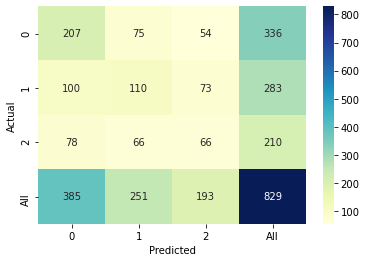

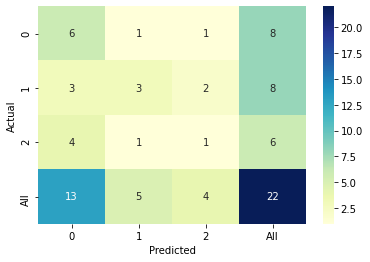

<Figure size 432x288 with 0 Axes>

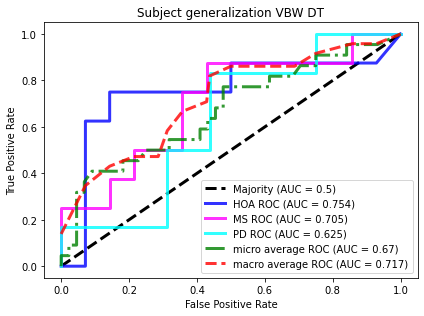

********************************
linear_svm
best_params:  {'svc__gamma': 0.0001}

Stride-based model performance (mean):  [0.405824228795178, 0.33865701414976884, 0.405824228795178, 0.3700074491244928, [0.546342559085983, 0.3425490196078431, 0.12707946375548057], 0.37404921451064377, 0.405824228795178, 0.405824228795178, [0.6341316785148527, 0.37166602054661757, 0.11634994447046097], 0.3457613148844788, 0.405824228795178, 0.37662185950908944, [0.5665574322889448, 0.3536080752460546, 0.11711843711843711], 0.5109354172906462, 0.5187076945656249]

Stride-based model performance (standard deviation):  [0.0769991412682716, 0.11215689056836835, 0.0769991412682716, 0.12774613885164468, [0.15103950960720408, 0.19418067584861104, 0.09643302652305895], 0.0692286731360914, 0.0769991412682716, 0.0769991412682716, [0.1504192599236951, 0.2400637297153526, 0.1229590000642158], 0.09650854875670856, 0.07699914126827163, 0.10758063960453816, [0.10247614823654612, 0.2125850511577671, 0.11141905342038497]

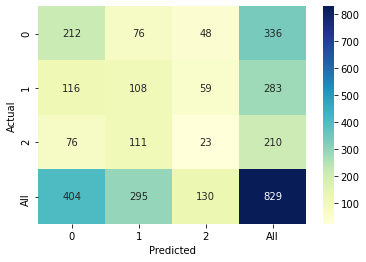

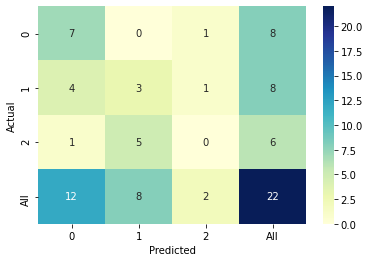

<Figure size 432x288 with 0 Axes>

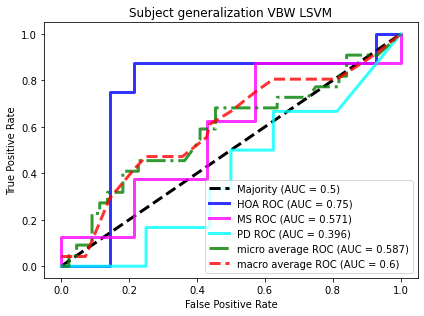

********************************
logistic_regression
best_params:  {'logisticregression__random_state': 0}

Stride-based model performance (mean):  [0.43243365197870565, 0.3721070750576804, 0.43243365197870565, 0.40773853238410734, [0.5975757575757575, 0.3487576776094938, 0.16998778998779], 0.40064684398106465, 0.43243365197870565, 0.43243365197870565, [0.6250432687901758, 0.42307795438392454, 0.15381930876909355], 0.3717494063442882, 0.43243365197870565, 0.40387066524094967, [0.5792618444832924, 0.3777157547569692, 0.15827061979260323], 0.5196294257211259, 0.526713835797551]

Stride-based model performance (standard deviation):  [0.09051898273100525, 0.14488738716882946, 0.09051898273100525, 0.1541157647125144, [0.17429998242682174, 0.21807739301850734, 0.1779861818358441], 0.0937764521134483, 0.09051898273100525, 0.09051898273100525, [0.151323781879185, 0.2700875780691496, 0.18940237877503602], 0.12290151275229091, 0.09051898273100527, 0.12552343680299632, [0.0839251941670668, 0.2323

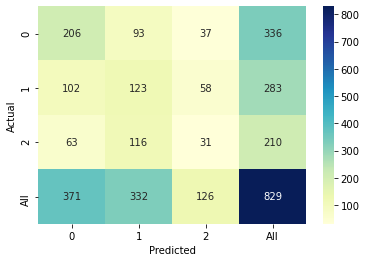

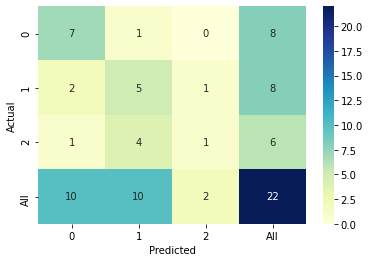

<Figure size 432x288 with 0 Axes>

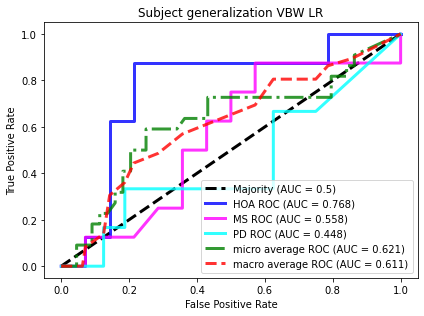

********************************
mlp
best_params:  {'mlpclassifier__hidden_layer_sizes': (10, 10, 25, 50, 25, 5)}

Stride-based model performance (mean):  [0.43228978977905264, 0.3421642716932067, 0.43228978977905264, 0.350474817414784, [0.4090775681341719, 0.3793810589112602, 0.23803418803418802], 0.41093439007380833, 0.43228978977905264, 0.43228978977905264, [0.6260597253315529, 0.4377721780706855, 0.16897126681918648], 0.35315594517671356, 0.43228978977905264, 0.3677146118647069, [0.4820519460030679, 0.3847824014490681, 0.19263348807800462], 0.5604430893294025, 0.5638335254656385]

Stride-based model performance (standard deviation):  [0.10633205132719488, 0.1621696305224752, 0.10633205132719488, 0.17500256613041637, [0.25755716056942995, 0.2809546010102176, 0.14800460117666794], 0.09400176594995775, 0.10633205132719488, 0.10633205132719488, [0.37936068837636105, 0.3058323046715786, 0.13208623634461303], 0.13463932851432608, 0.10633205132719488, 0.14935995184773598, [0.2897986275330

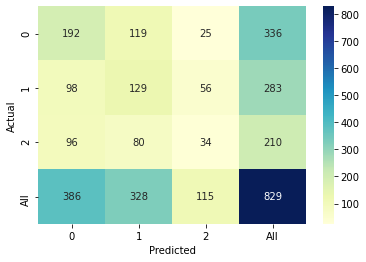

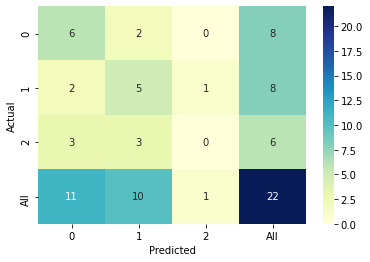

<Figure size 432x288 with 0 Axes>

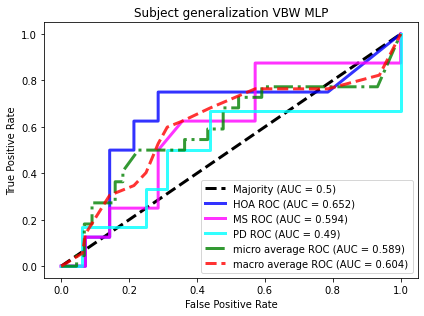

********************************


In [19]:
ml_models = ['random_forest', 'adaboost', 'kernel_svm', 'gbm', 'xgboost', 'knn', 'decision_tree',  'linear_svm', 
             'logistic_regression', 'mlp']
metrics_VBW = run_ml_models(ml_models, X_VBW, Y_VBW, framework, results_path, save_results)

In [20]:
metrics_VBW

random_forest  \
stride_accuracy_mean                                                       0.415817   
stride_precision_macro_mean                                                0.409649   
stride_precision_micro_mean                                                0.415817   
stride_precision_weighted_mean                                             0.430573   
stride_precision_class_wise_mean  [0.6105031056011448, 0.26361110759395795, 0.35...   
stride_recall_macro_mean                                                   0.384541   
stride_recall_micro_mean                                                   0.415817   
stride_recall_weighted_mean                                                0.415817   
stride_recall_class_wise_mean     [0.6444337090713902, 0.3717522775731731, 0.137...   
stride_F1_macro_mean                                                       0.371032   
stride_F1_micro_mean                                                       0.415817   
stride_F1_weighted_mean                                                    0.400111   
stride_F1_class_wise_mean         [0.6134070800677596, 0.3058701267495645, 0.193...   
stride_AUC_macro_mean                                                      0.579154   
stride_AUC_weighted_mean                                                   0.582800   
stride_accuracy_std                                                        0.076781   
stride_precision_macro_std                                                 0.085553   
stride_precision_micro_std                                                 0.076781   
stride_precision_weighted_std                                              0.073932   
stride_precision_class_wise_std   [0.10328045236081704, 0.1291290788155685, 0.31...   
stride_recall_macro_std                                                    0.079791   
stride_recall_micro_std                                                    0.076781   
stride_recall_weighted_std                                                 0.076781   
stride_recall_class_wise_std      [0.17772997749166072, 0.2114777856826512, 0.10...   
stride_F1_macro_std                                                        0.074928   
stride_F1_micro_std                                                        0.076781   
stride_F1_weighted_std                                                     0.073977   
stride_F1_class_wise_std          [0.09531427405892674, 0.16223315620208165, 0.1...   
stride_AUC_macro_std                                                       0.064879   
stride_AUC_weighted_std                                                    0.064830   
person_accuracy_mean                                                       0.493333   
person_precision_macro_mean                                                0.466667   
person_precision_micro_mean                                                0.493333   
person_precision_weighted_mean                                             0.753333   
person_precision_class_wise_mean                                    [0.8, 0.6, 0.0]   
person_recall_macro_mean                                                   0.366667   
person_recall_micro_mean                                                   0.493333   
person_recall_weighted_mean                                                0.493333   
person_recall_class_wise_mean                                       [0.8, 0.3, 0.0]   
person_F1_macro_mean                                                       0.388889   
person_F1_micro_mean                                                       0.493333   
person_F1_weighted_mean                                                    0.573333   
person_F1_class_wise_mean                                           [0.8, 0.6, 0.0]   
person_AUC_macro_mean                                                      0.587500   
person_AUC_weighted_mean                                                   0.586667   
person_accuracy_std                                                 

### Subject generalization framework 4: virtual beam walking while talking (VBWT) to classify strides and subjects of HOA/MS/PD

In [21]:
#Trial VBWT for the fourth framework of subject generalization
trialVBWT = data[data['scenario']=='SLWT']
print ('Original number of subjects in trial VBWT for cross validation:', len(trialVBWT['PID'].unique()))
print ('Number of subjects in trial VBWT in each cohort:\n', trialVBWT.groupby('PID').first()['cohort'].value_counts())

cols_to_drop = ['PID', 'key', 'cohort', 'trial', 'scenario', 'video', 'stride_number', 'label']
#Shuffling the cross validation stride data
trialVBWT = shuffle(trialVBWT, random_state = 0)
#CV for people generalize so no train-test split
X_VBWT = trialVBWT.drop(cols_to_drop, axis = 1)
Y_VBWT = trialVBWT[['PID', 'label']]

#Total strides and imbalance of labels in the training and testing set
#Training set 
print('Strides in trial VBWT for cross validation: ', len(trialVBWT))
print ('HOA, MS and PD strides in trial VBWT:\n', trialVBWT['cohort'].value_counts())
print ('Imbalance ratio in trial VBWT (controls:MS:PD)= 1:X:Y\n', trialVBWT['cohort'].value_counts()/trialVBWT['cohort'].value_counts()['HOA'])
#Defining the framework of interest
framework = 'VBWT'

Original number of subjects in trial VBWT for cross validation: 21
Number of subjects in trial VBWT in each cohort:
 HOA    8
MS     7
PD     6
Name: cohort, dtype: int64
Strides in trial VBWT for cross validation:  837
HOA, MS and PD strides in trial VBWT:
 HOA    341
MS     254
PD     242
Name: cohort, dtype: int64
Imbalance ratio in trial VBWT (controls:MS:PD)= 1:X:Y
 HOA    1.000000
MS     0.744868
PD     0.709677
Name: cohort, dtype: float64


random_forest
best_params:  {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 0.1, 'randomforestclassifier__n_estimators': 50}

Stride-based model performance (mean):  [0.4361437162996463, 0.4660132877270204, 0.4361437162996463, 0.5071436791246278, [0.6181223748421637, 0.3748807438906088, 0.4050367444482887], 0.4463508758781223, 0.4361437162996463, 0.4361437162996463, [0.5896506604883478, 0.40133929348130765, 0.34806267366471133], 0.4082640665659024, 0.4361437162996463, 0.417323006883764, [0.5361883869059175, 0.3494455455618136, 0.3391582672299764], 0.631461201088494, 0.6403752522316761]

Stride-based model performance (standard deviation):  [0.12317608669457142, 0.09083219322933694, 0.12317608669457142, 0.07496829412747111, [0.17576977049658052, 0.2127716668256086, 0.3482588702419118], 0.12666879378764112, 0.12317608669457142, 0.12317608669457142, [0.

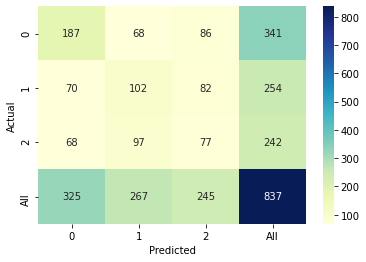

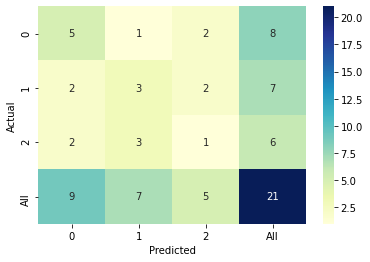

<Figure size 432x288 with 0 Axes>

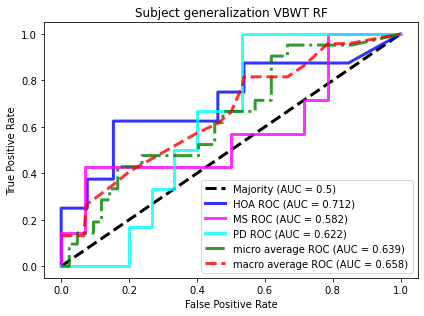

********************************
adaboost
best_params:  {'adaboostclassifier__learning_rate': 0.1, 'adaboostclassifier__n_estimators': 50}

Stride-based model performance (mean):  [0.4566896480771782, 0.45628862019942174, 0.4566896480771782, 0.4927085527599103, [0.5643645670284851, 0.3431467341507046, 0.46135455941907555], 0.4603786662034571, 0.4566896480771782, 0.4566896480771782, [0.6105960386396082, 0.38963381609919767, 0.3809061438715653], 0.4228600433477642, 0.4566896480771782, 0.4377526735304068, [0.5452655772064073, 0.33361226772991476, 0.3897022851069707], 0.5901025745104153, 0.5924769859325885]

Stride-based model performance (standard deviation):  [0.12734839691109823, 0.11144433063980366, 0.12734839691109823, 0.09735595133697424, [0.15848918818490323, 0.22653350539528982, 0.3517402317538392], 0.13350611221626432, 0.12734839691109823, 0.12734839691109823, [0.30845888837590363, 0.341208408776187, 0.22745064236701432], 0.11358606542134642, 0.12734839691109823, 0.105839117471746

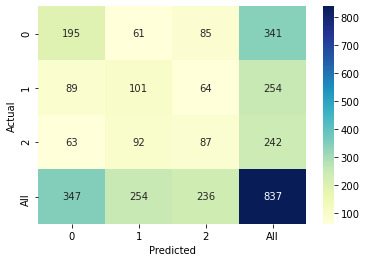

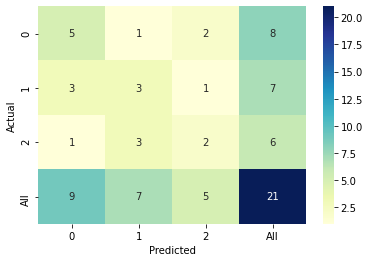

<Figure size 432x288 with 0 Axes>

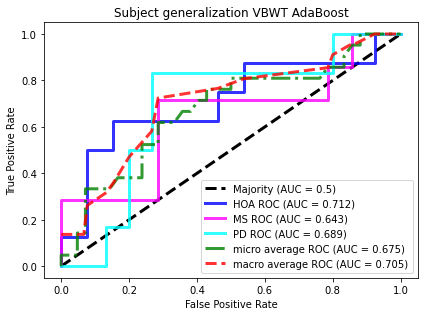

********************************
kernel_svm
best_params:  {'svc__gamma': 1}

Stride-based model performance (mean):  [0.40266004782880194, 0.13422001594293398, 0.40266004782880194, 0.16755466446926165, [0.4026600478288019, 0.0, 0.0], 0.3333333333333333, 0.40266004782880194, 0.40266004782880194, [1.0, 0.0, 0.0], 0.19005057313026535, 0.40266004782880194, 0.23516837626680775, [0.570151719390796, 0.0, 0.0], 0.48570239625537204, 0.48204336518574753]

Stride-based model performance (standard deviation):  [0.07361759539518099, 0.02453919846506033, 0.07361759539518099, 0.05856110234947809, [0.0823069738218501, 0.0, 0.0], 0.0, 0.07361759539518099, 0.07361759539518099, [0.0, 0.0, 0.0], 0.025348546451362492, 0.07361759539518099, 0.07139264670049396, [0.08502160949408638, 0.0, 0.0], 0.07966720541412894, 0.07949237431906829]

Person-based model performance (mean):  [0.37666666666666665, 0.3333333333333333, 0.37666666666666665, 1.0, [1.0, 0.0, 0.0], 0.12555555555555556, 0.37666666666666665, 0.376666

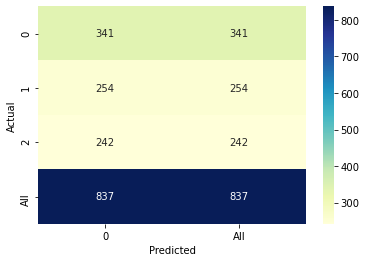

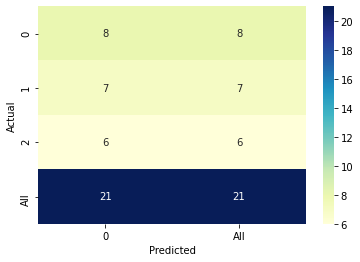

<Figure size 432x288 with 0 Axes>

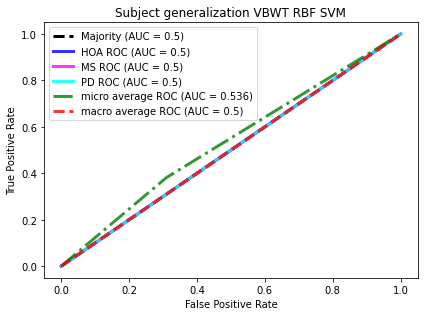

********************************
gbm
best_params:  {'gradientboostingclassifier__learning_rate': 0.05, 'gradientboostingclassifier__max_depth': 2, 'gradientboostingclassifier__max_features': 'auto', 'gradientboostingclassifier__min_samples_leaf': 3, 'gradientboostingclassifier__min_samples_split': 2, 'gradientboostingclassifier__n_estimators': 100}

Stride-based model performance (mean):  [0.43424864290969234, 0.4315653305167787, 0.43424864290969234, 0.4624003131846283, [0.5347443794402371, 0.36346682375031064, 0.39648478835978834], 0.4361664742504501, 0.43424864290969234, 0.43424864290969234, [0.6370562296086829, 0.4112579507839146, 0.2601852423587527], 0.3952198610889894, 0.43424864290969234, 0.4078250870739695, [0.5393883454818801, 0.35876372180834937, 0.2875075159767385], 0.6353195229329381, 0.6414832722020227]

Stride-based model performance (standard deviation):  [0.10940418519273316, 0.08752866670584958, 0.10940418519273316, 0.07226657814293477, [0.11143221586347127, 0.272020906

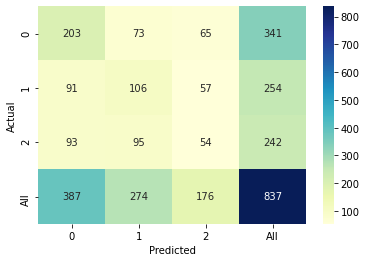

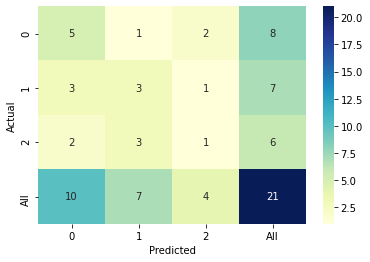

<Figure size 432x288 with 0 Axes>

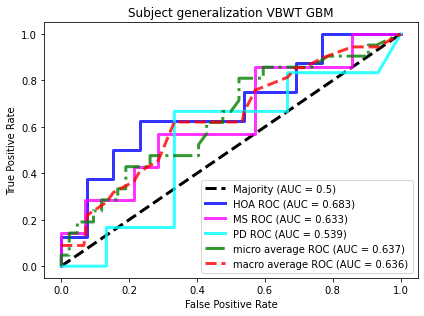

********************************
xgboost
best_params:  {'xgbclassifier__colsample_bytree': 0.6, 'xgbclassifier__gamma': 2, 'xgbclassifier__max_depth': 8, 'xgbclassifier__min_child_weight': 5, 'xgbclassifier__subsample': 1.0}

Stride-based model performance (mean):  [0.4320040508606482, 0.41607812854792725, 0.4320040508606482, 0.4432468896408279, [0.49462006763797045, 0.3904466633470486, 0.3631676546587627], 0.4269638178507048, 0.4320040508606482, 0.4320040508606482, [0.6369371819896352, 0.44742756578909215, 0.19652670577338685], 0.3857503796950401, 0.4320040508606482, 0.4020152670060866, [0.5286048664142695, 0.3934684070582027, 0.23517786561264822], 0.6293166087972548, 0.6336800694887196]

Stride-based model performance (standard deviation):  [0.10432725087258364, 0.1008191292136131, 0.10432725087258364, 0.09894918865776813, [0.09158831205976702, 0.307795241238196, 0.3277954794012116], 0.10319282610267363, 0.10432725087258364, 0.10432725087258364, [0.2800131626974288, 0.285771392573672

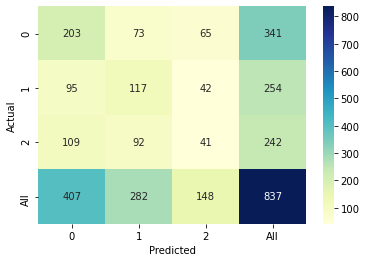

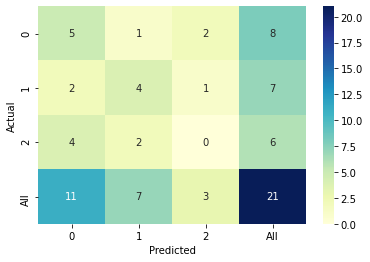

<Figure size 432x288 with 0 Axes>

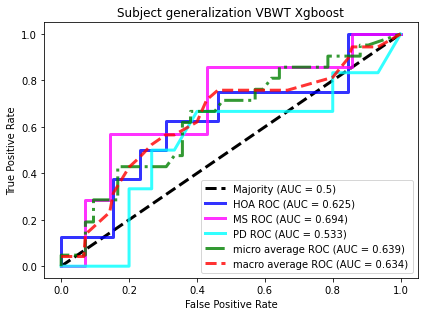

********************************
knn
best_params:  {'kneighborsclassifier__n_neighbors': 4, 'kneighborsclassifier__p': 5}

Stride-based model performance (mean):  [0.4042333184796571, 0.35253411276116975, 0.4042333184796571, 0.3859841051541139, [0.45393731731414033, 0.3943722943722944, 0.20929272659707443], 0.37829184449852943, 0.4042333184796571, 0.4042333184796571, [0.6630177520714086, 0.3706583371512561, 0.10119944427292374], 0.3374164339109008, 0.4042333184796571, 0.3660843010547534, [0.5238092580313287, 0.3618626141072629, 0.1265774295941109], 0.5448049672681019, 0.5507900684040871]

Stride-based model performance (standard deviation):  [0.046360266630061056, 0.059001310128539874, 0.046360266630061056, 0.054484096269649764, [0.08683348281869309, 0.20590685085445815, 0.10823947761031968], 0.07362903153741555, 0.046360266630061056, 0.046360266630061056, [0.2284891061283007, 0.2283895052721759, 0.04594574937542968], 0.06406033069205516, 0.046360266630061056, 0.05350981729542907, [0.0

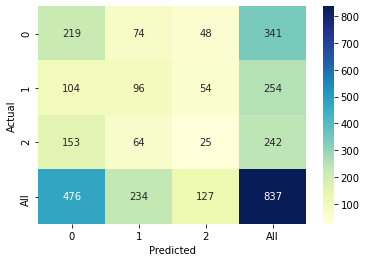

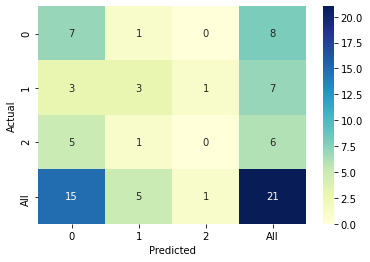

<Figure size 432x288 with 0 Axes>

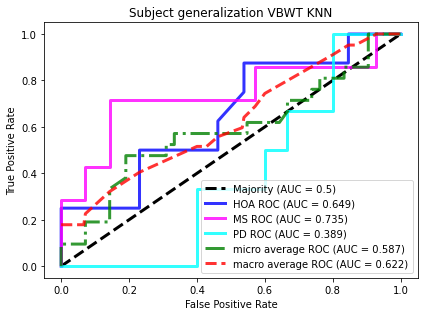

********************************
decision_tree
best_params:  {'decisiontreeclassifier__min_samples_split': 43}

Stride-based model performance (mean):  [0.49404217361646063, 0.4719170608006215, 0.49404217361646063, 0.5030937199591843, [0.5987728878051459, 0.4364895727922074, 0.38048872180451127], 0.49339848126437474, 0.49404217361646063, 0.49404217361646063, [0.6575424229652634, 0.5713563243165918, 0.2512966965112689], 0.45709568010006774, 0.49404217361646063, 0.47363328367538704, [0.6078576530771985, 0.4685804701627486, 0.29484891706025607], 0.6547885545316885, 0.6568473087924891]

Stride-based model performance (standard deviation):  [0.04459598184433341, 0.0575545840794397, 0.04459598184433341, 0.04242354575467786, [0.09271299323848968, 0.10864336674734082, 0.20139713891717242], 0.049688876244118815, 0.04459598184433341, 0.04459598184433341, [0.20403073298541036, 0.2337884126149417, 0.13855219408219457], 0.048831712423983965, 0.04459598184433341, 0.03898566566358837, [0.094690869224

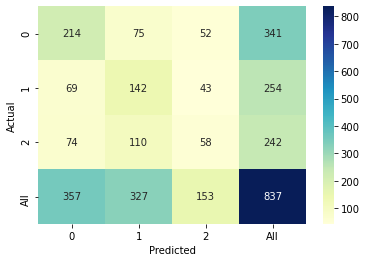

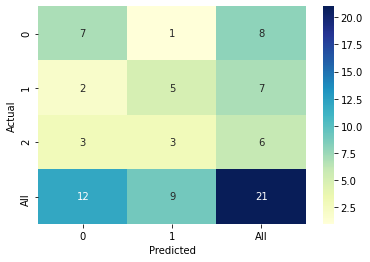

<Figure size 432x288 with 0 Axes>

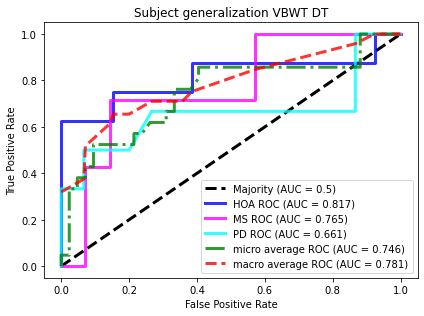

********************************
linear_svm
best_params:  {'svc__gamma': 0.0001}

Stride-based model performance (mean):  [0.39617182702825743, 0.387818050718062, 0.39617182702825743, 0.4231923223134645, [0.5160503263568946, 0.3601294805137927, 0.2872743452834986], 0.3750829546188169, 0.39617182702825743, 0.39617182702825743, [0.6778943328522219, 0.3760423976297304, 0.07131213337449831], 0.32991804017628784, 0.39617182702825743, 0.35997103685964416, [0.5455335688061205, 0.35073818348189156, 0.09348236824085142], 0.5881504301437157, 0.6017212079269838]

Stride-based model performance (standard deviation):  [0.0816333378115825, 0.09444286477502166, 0.0816333378115825, 0.09637177733793292, [0.11335920125814032, 0.29759745345660354, 0.404586030450524], 0.07903166765160062, 0.0816333378115825, 0.0816333378115825, [0.25843030925482835, 0.2401647001696325, 0.04283316708381749], 0.08153110500829519, 0.0816333378115825, 0.09393427519897317, [0.05902704533874998, 0.25570902788865857, 0.056236999

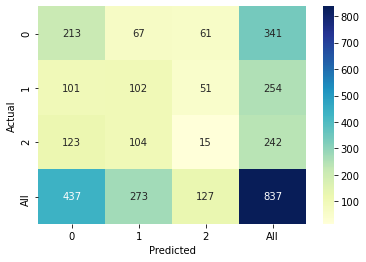

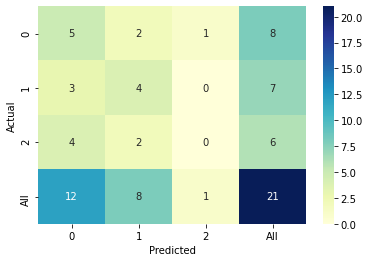

<Figure size 432x288 with 0 Axes>

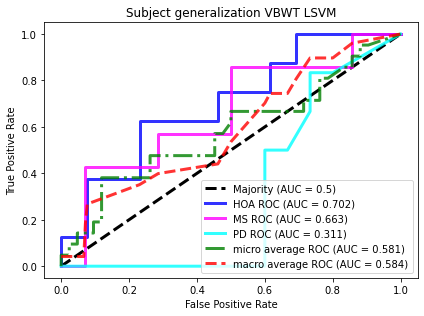

********************************
logistic_regression
best_params:  {'logisticregression__random_state': 0}

Stride-based model performance (mean):  [0.39519952625094934, 0.40413742532348795, 0.39519952625094934, 0.4438901106275133, [0.5492702391537976, 0.392910475924728, 0.2702315608919382], 0.3839062254560791, 0.39519952625094934, 0.39519952625094934, [0.61943794917799, 0.43423194670244236, 0.09804878048780488], 0.34646068957894577, 0.39519952625094934, 0.37116973268316655, [0.5249528174668132, 0.38722526664864554, 0.1272039846213785], 0.5689040618594071, 0.580418111045981]

Stride-based model performance (standard deviation):  [0.10489130971864859, 0.11333261076893565, 0.10489130971864859, 0.11532942377731577, [0.14925937885733007, 0.26944050742248454, 0.4130548792622311], 0.09062205276676537, 0.10489130971864859, 0.10489130971864859, [0.2943453778935095, 0.21047943198456176, 0.07111753474192695], 0.08838801817261528, 0.10489130971864859, 0.10067047047636479, [0.09536010006872808, 0.

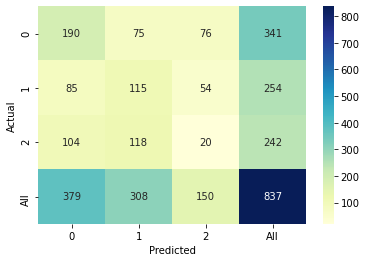

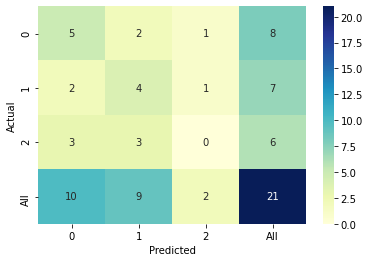

<Figure size 432x288 with 0 Axes>

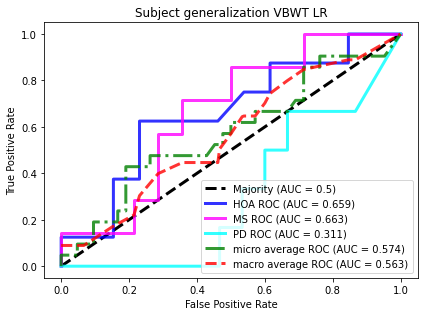

********************************
mlp
best_params:  {'mlpclassifier__hidden_layer_sizes': (5, 5, 5, 5, 5, 20, 20, 100, 10, 10)}

Stride-based model performance (mean):  [0.4195543756958723, 0.4042465491128783, 0.4195543756958723, 0.44498095815771466, [0.5901327400815721, 0.32315473560170865, 0.29945217165535404], 0.41289796782614696, 0.4195543756958723, 0.4195543756958723, [0.5929708495894855, 0.4321478763650282, 0.21357517752392713], 0.37914644064346237, 0.4195543756958723, 0.39892605794797004, [0.5385535668538972, 0.3581231671554252, 0.24076258792106475], 0.5714466549730489, 0.5804300214855005]

Stride-based model performance (standard deviation):  [0.10041128942031369, 0.05974842785081086, 0.10041128942031369, 0.06918099512289395, [0.13766365091364732, 0.2762777239936099, 0.2552123170961651], 0.09381448723661927, 0.10041128942031369, 0.10041128942031369, [0.2676990416863112, 0.30752681572391233, 0.1344961509935076], 0.08276882387045811, 0.10041128942031369, 0.08452905371505995, [0.09

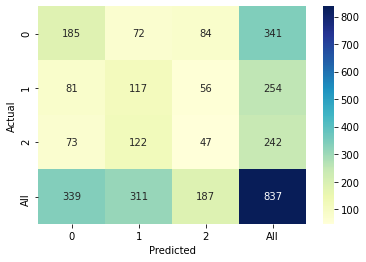

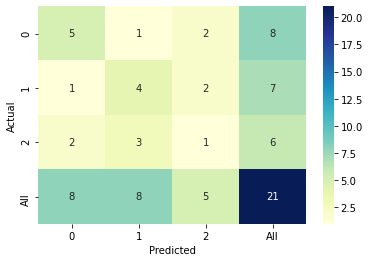

<Figure size 432x288 with 0 Axes>

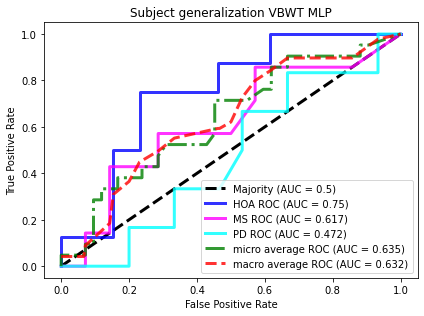

********************************


In [22]:
ml_models = ['random_forest', 'adaboost', 'kernel_svm', 'gbm', 'xgboost', 'knn', 'decision_tree',  'linear_svm', 
             'logistic_regression', 'mlp']
metrics_VBWT = run_ml_models(ml_models, X_VBWT, Y_VBWT, framework, results_path, save_results)

In [23]:
metrics_VBWT

random_forest  \
stride_accuracy_mean                                                       0.436144   
stride_precision_macro_mean                                                0.466013   
stride_precision_micro_mean                                                0.436144   
stride_precision_weighted_mean                                             0.507144   
stride_precision_class_wise_mean  [0.6181223748421637, 0.3748807438906088, 0.405...   
stride_recall_macro_mean                                                   0.446351   
stride_recall_micro_mean                                                   0.436144   
stride_recall_weighted_mean                                                0.436144   
stride_recall_class_wise_mean     [0.5896506604883478, 0.40133929348130765, 0.34...   
stride_F1_macro_mean                                                       0.408264   
stride_F1_micro_mean                                                       0.436144   
stride_F1_weighted_mean                                                    0.417323   
stride_F1_class_wise_mean         [0.5361883869059175, 0.3494455455618136, 0.339...   
stride_AUC_macro_mean                                                      0.631461   
stride_AUC_weighted_mean                                                   0.640375   
stride_accuracy_std                                                        0.123176   
stride_precision_macro_std                                                 0.090832   
stride_precision_micro_std                                                 0.123176   
stride_precision_weighted_std                                              0.074968   
stride_precision_class_wise_std   [0.17576977049658052, 0.2127716668256086, 0.34...   
stride_recall_macro_std                                                    0.126669   
stride_recall_micro_std                                                    0.123176   
stride_recall_weighted_std                                                 0.123176   
stride_recall_class_wise_std      [0.3117085189056158, 0.33856129042749017, 0.23...   
stride_F1_macro_std                                                        0.107322   
stride_F1_micro_std                                                        0.123176   
stride_F1_weighted_std                                                     0.100073   
stride_F1_class_wise_std          [0.17036816445333455, 0.2504557287197678, 0.26...   
stride_AUC_macro_std                                                       0.153761   
stride_AUC_weighted_std                                                    0.149485   
person_accuracy_mean                                                       0.433333   
person_precision_macro_mean                                                0.433333   
person_precision_micro_mean                                                0.433333   
person_precision_weighted_mean                                             0.605000   
person_precision_class_wise_mean                                    [0.7, 0.4, 0.2]   
person_recall_macro_mean                                                   0.344444   
person_recall_micro_mean                                                   0.433333   
person_recall_weighted_mean                                                0.433333   
person_recall_class_wise_mean                       [0.43333333333333335, 0.4, 0.2]   
person_F1_macro_mean                                                       0.364444   
person_F1_micro_mean                                                       0.433333   
person_F1_weighted_mean                                                    0.484889   
person_F1_class_wise_mean                                           [0.7, 0.4, 0.2]   
person_AUC_macro_mean                                                      0.658333   
person_AUC_weighted_mean                                                   0.665417   
person_accuracy_std                                                 

In [24]:
#To do!
#ROC- Done 
#Confusion matrix files - Done
#CF itself - Done
#Saving all results to results folder - Done
#Comments in utility functions - Done
#micro macro weighted save all results 
#How can we compare different frameworks


## Compare traditional algorithms among the 4 sub-frameworks of subject generalization

In [ ]:
#To compare across the 4 sub-frameworks of subject generalization, we reduce to common subjects across all 4 sub-frameworks 
#and then compare for the best accuracy/model in each sub-framework 

#Retaining the common PIDs across the 4 tasks 
common_pids = keep_common_PIDs(data, ['W', 'WT', 'SLW', 'SLWT'])

#Retaining the data with only common PIDs
reduced_data = data[data.PID.isin(common_pids)]
print ('Number of subjects in each cohort in reduced data with common PIDs:\n', \
       reduced_data.groupby('PID').first()['cohort'].value_counts())
design()
#Checking the retained strides in each task after reducing to commpn PIDs only
for scen in ['W', 'WT', 'SLW', 'SLWT']:
    reduced_data_scen = reduced_data[reduced_data.scenario==scen].reset_index().drop('index', axis = 1)
    print ('No. of strides retained in scenario', scen, 'are: ', reduced_data_scen.shape)
    print ('No. of strides retained for each cohort in scenario', scen, 'are:\n', reduced_data_scen['cohort'].value_counts())
    print ('Imbalance ratio in scenario', scen, '(controls:MS:PD)= 1:X:Y\n', \
           reduced_data_scen['cohort'].value_counts()/reduced_data_scen['cohort'].value_counts()['HOA'])
    design()

#### Trial W

In [ ]:
#Running the traditional models again for all sub-frameworks of suject generalization to give a ranking of best to worst 
#tasks for subject generalization 

#Trial W
reduced_data_W = reduced_data[reduced_data.scenario=='W'].reset_index().drop('index', axis = 1)
cols_to_drop = ['PID', 'key', 'cohort', 'trial', 'scenario', 'video', 'stride_number', 'label']

#Shuffling the cross validation stride data
reduced_data_W = shuffle(reduced_data_W, random_state = 0)
#CV for people generalize so no train-test split
X_reduced_data_W = reduced_data_W.drop(cols_to_drop, axis = 1)
Y_reduced_data_W = reduced_data_W[['PID', 'label']]

#Defining the framework of interest
framework = 'reducedW_for_comparision'

In [ ]:
ml_models = ['random_forest', 'adaboost', 'kernel_svm', 'gbm', 'xgboost', 'knn', 'decision_tree',  'linear_svm', 
             'logistic_regression', 'mlp']
metrics_reducedW_for_comparision = run_ml_models(ml_models, X_reduced_data_W, Y_reduced_data_W, framework, results_path, save_results)

In [ ]:
metrics_reducedW_for_comparision

#### Trial WT

In [ ]:
#Running the traditional models again for all sub-frameworks of suject generalization to give a ranking of best to worst 
#tasks for subject generalization 

#Trial WT
reduced_data_WT = reduced_data[reduced_data.scenario=='WT'].reset_index().drop('index', axis = 1)
cols_to_drop = ['PID', 'key', 'cohort', 'trial', 'scenario', 'video', 'stride_number', 'label']

#Shuffling the cross validation stride data
reduced_data_WT = shuffle(reduced_data_WT, random_state = 0)
#CV for people generalize so no train-test split
X_reduced_data_WT = reduced_data_WT.drop(cols_to_drop, axis = 1)
Y_reduced_data_WT = reduced_data_WT[['PID', 'label']]

#Defining the framework of interest
framework = 'reducedWT_for_comparision'

In [ ]:
ml_models = ['random_forest', 'adaboost', 'kernel_svm', 'gbm', 'xgboost', 'knn', 'decision_tree',  'linear_svm', 
             'logistic_regression', 'mlp']
metrics_reducedWT_for_comparision = run_ml_models(ml_models, X_reduced_data_WT, Y_reduced_data_WT, framework, results_path, save_results)

In [ ]:
metrics_reducedWT_for_comparision

#### Trial VBW

In [ ]:
#Running the traditional models again for all sub-frameworks of suject generalization to give a ranking of best to worst 
#tasks for subject generalization 

#Trial VBW
reduced_data_VBW = reduced_data[reduced_data.scenario=='SLW'].reset_index().drop('index', axis = 1)
cols_to_drop = ['PID', 'key', 'cohort', 'trial', 'scenario', 'video', 'stride_number', 'label']

#Shuffling the cross validation stride data
reduced_data_VBW = shuffle(reduced_data_VBW, random_state = 0)
#CV for people generalize so no train-test split
X_reduced_data_VBW = reduced_data_VBW.drop(cols_to_drop, axis = 1)
Y_reduced_data_VBW = reduced_data_VBW[['PID', 'label']]

#Defining the framework of interest
framework = 'reducedVBW_for_comparision'

In [ ]:
ml_models = ['random_forest', 'adaboost', 'kernel_svm', 'gbm', 'xgboost', 'knn', 'decision_tree',  'linear_svm', 
             'logistic_regression', 'mlp']
metrics_reducedVBW_for_comparision = run_ml_models(ml_models, X_reduced_data_VBW, Y_reduced_data_VBW, framework, results_path, save_results)

In [ ]:
metrics_reducedVBW_for_comparision
#HOA is doing better than W and WT even though not in full model 
#Sequential test - this is screening test - first classify HOA or not using VBW task and then then do further screening out of PD/MS 

#### Trial VBWT

In [ ]:
#Running the traditional models again for all sub-frameworks of suject generalization to give a ranking of best to worst 
#tasks for subject generalization 

#Trial VBWT
reduced_data_VBWT = reduced_data[reduced_data.scenario=='SLWT'].reset_index().drop('index', axis = 1)
cols_to_drop = ['PID', 'key', 'cohort', 'trial', 'scenario', 'video', 'stride_number', 'label']

#Shuffling the cross validation stride data
reduced_data_VBWT = shuffle(reduced_data_VBWT, random_state = 0)
#CV for people generalize so no train-test split
X_reduced_data_VBWT = reduced_data_VBWT.drop(cols_to_drop, axis = 1)
Y_reduced_data_VBWT = reduced_data_VBWT[['PID', 'label']]

#Defining the framework of interest
framework = 'reducedVBWT_for_comparision'

In [ ]:
ml_models = ['random_forest', 'adaboost', 'kernel_svm', 'gbm', 'xgboost', 'knn', 'decision_tree',  'linear_svm', 
             'logistic_regression', 'mlp']
metrics_reducedVBWT_for_comparision = run_ml_models(ml_models, X_reduced_data_VBWT, Y_reduced_data_VBWT, framework, results_path, save_results)

In [ ]:
metrics_reducedVBWT_for_comparision


In [ ]:
#RESULTS of comparing 4 sub-frameworks for subject generalization
#WT>>W>>VBWT>>VBW 
#VBW is screening test since it performs well (looking at the confusion matrix) for predicting HOA or not, but we need something more to 
#distinguish well between the two neurological populations (MS and PD).

## Compare traditional algorithms among the 2 sub-frameworks of subject generalization, namely W and WT 

In [25]:
#To compare across the 2 sub-frameworks of subject generalization, we reduce to common subjects across all 2 sub-frameworks 
#and then compare for the best accuracy/model in each sub-framework 

#Retaining the common PIDs across the 2 walking tasks 
common_pids = keep_common_PIDs(data, ['W', 'WT'])

#Retaining the data with only common PIDs
reduced_data = data[data.PID.isin(common_pids)]
print ('Number of subjects in each cohort in reduced data with common PIDs:\n', \
       reduced_data.groupby('PID').first()['cohort'].value_counts())
design()
#Checking the retained strides in each task after reducing to commpn PIDs only
for scen in ['W', 'WT']:
    reduced_data_scen = reduced_data[reduced_data.scenario==scen].reset_index().drop('index', axis = 1)
    print ('No. of strides retained in scenario', scen, 'are: ', reduced_data_scen.shape)
    print ('No. of strides retained for each cohort in scenario', scen, 'are:\n', reduced_data_scen['cohort'].value_counts())
    print ('Imbalance ratio in scenario', scen, '(controls:MS:PD)= 1:X:Y\n', \
           reduced_data_scen['cohort'].value_counts()/reduced_data_scen['cohort'].value_counts()['HOA'])
    design()

Original number of subjects in task W are: 32
Original number of subjects in task WT are: 26
Common number of subjects across all frameworks:  25
Common subjects across all frameworks:  [404, 405, 406, 407, 408, 409, 410, 411, 310, 311, 313, 314, 318, 320, 321, 322, 323, 212, 213, 214, 215, 216, 217, 218, 219]
Number of subjects in each cohort in reduced data with common PIDs:
 MS     9
PD     8
HOA    8
Name: cohort, dtype: int64
******************************************
No. of strides retained in scenario W are:  (1008, 99)
No. of strides retained for each cohort in scenario W are:
 MS     341
HOA    334
PD     333
Name: cohort, dtype: int64
Imbalance ratio in scenario W (controls:MS:PD)= 1:X:Y
 MS     1.020958
HOA    1.000000
PD     0.997006
Name: cohort, dtype: float64
******************************************
No. of strides retained in scenario WT are:  (1016, 99)
No. of strides retained for each cohort in scenario WT are:
 HOA    351
PD     333
MS     332
Name: cohort, dtype: i

### Trial W

In [26]:
#Running the traditional models again for all sub-frameworks of suject generalization to give a ranking of best to worst 
#tasks for subject generalization 

#Trial W
reduced_data_W = reduced_data[reduced_data.scenario=='W'].reset_index().drop('index', axis = 1)
cols_to_drop = ['PID', 'key', 'cohort', 'trial', 'scenario', 'video', 'stride_number', 'label']

#Shuffling the cross validation stride data
reduced_data_W = shuffle(reduced_data_W, random_state = 0)
#CV for people generalize so no train-test split
X_reduced_data_W = reduced_data_W.drop(cols_to_drop, axis = 1)
Y_reduced_data_W = reduced_data_W[['PID', 'label']]

#Defining the framework of interest
framework = 'reducedW_for_comparision_WandWTonly'

random_forest
best_params:  {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 0.05, 'randomforestclassifier__n_estimators': 50}

Stride-based model performance (mean):  [0.5228547315094384, 0.5600686787594829, 0.5228547315094384, 0.5685935294459006, [0.5262701356088872, 0.5651048502790034, 0.5888310503905578], 0.5287703216229795, 0.5228547315094384, 0.5228547315094384, [0.6649525745257452, 0.4464124202098886, 0.47494597013330486], 0.5118138224699174, 0.5228547315094384, 0.514787530550006, [0.5524025072051075, 0.47148952880933337, 0.5115494313953111], 0.6806503048483764, 0.6779067728460152]

Stride-based model performance (standard deviation):  [0.21673200599123169, 0.23134777205674437, 0.21673200599123169, 0.23514353213553366, [0.19301526257743853, 0.30024563951552236, 0.3730409687215861], 0.2276059092096031, 0.21673200599123169, 0.21673200599123169, [

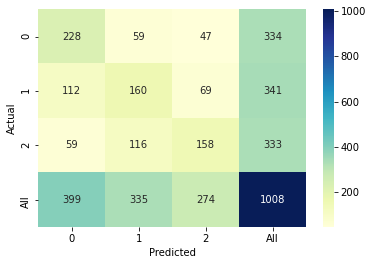

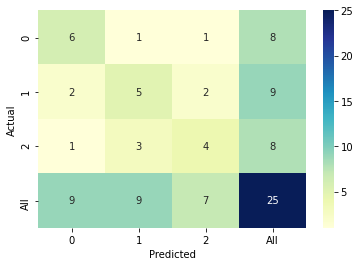

<Figure size 432x288 with 0 Axes>

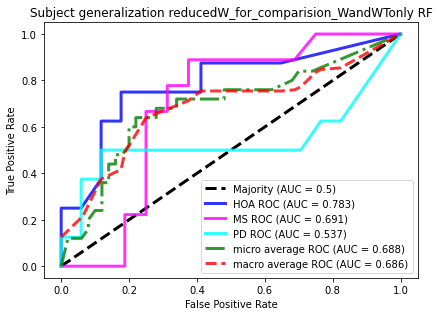

********************************
adaboost
best_params:  {'adaboostclassifier__learning_rate': 0.01, 'adaboostclassifier__n_estimators': 100}

Stride-based model performance (mean):  [0.5127674607445043, 0.5444643506891205, 0.5127674607445043, 0.5573389079056178, [0.5714317319848293, 0.5122009188675856, 0.5497604012149466], 0.5221387629396479, 0.5127674607445043, 0.5127674607445043, [0.6200677506775067, 0.39362761008330627, 0.5527209280581306], 0.5002753124335308, 0.5127674607445044, 0.5050249666938369, [0.5530873103224869, 0.42649675347306, 0.5212418735050459], 0.6495341041764235, 0.6460836088946212]

Stride-based model performance (standard deviation):  [0.20015276186503095, 0.19101300531852786, 0.20015276186503095, 0.2021667625987633, [0.22341390860194552, 0.24925040798498846, 0.31049478518395723], 0.21083203307516607, 0.20015276186503095, 0.20015276186503095, [0.357458636850162, 0.1780354587427065, 0.37675255285010717], 0.1952613434999908, 0.200152761865031, 0.19484289004458974, [0.

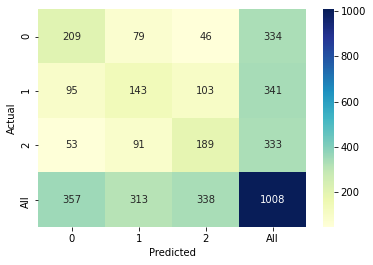

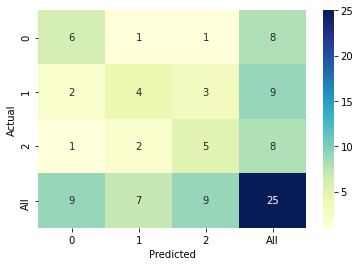

<Figure size 432x288 with 0 Axes>

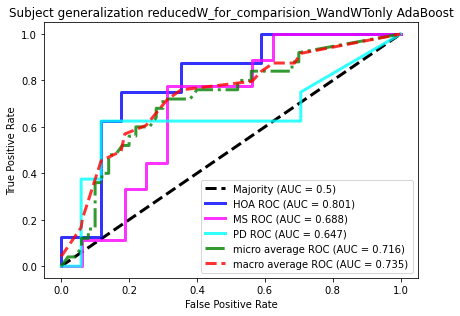

********************************
kernel_svm
best_params:  {'svc__gamma': 0.001}

Stride-based model performance (mean):  [0.5233679524582171, 0.5607791546783557, 0.5233679524582171, 0.5735691494995022, [0.5833587779487358, 0.5026022951816386, 0.5963763909046927], 0.5376154435606632, 0.5233679524582171, 0.5233679524582171, [0.6185162601626016, 0.49693065022178945, 0.49739942029759837], 0.5217105453852954, 0.5233679524582171, 0.5211018766450186, [0.5604180736667268, 0.48555526036651714, 0.5191583021226421], 0.7211562301010165, 0.718335470629804]

Stride-based model performance (standard deviation):  [0.1998307653947338, 0.20214942008052061, 0.1998307653947338, 0.21562922308806898, [0.23437447782788362, 0.2412308996235019, 0.3295782773822256], 0.2113182009866068, 0.1998307653947338, 0.1998307653947338, [0.3381497565660641, 0.22804199867381458, 0.32473681518444103], 0.19725521734819634, 0.19983076539473374, 0.19603916006923972, [0.22248664998515472, 0.2061254095738055, 0.2771924525373073],

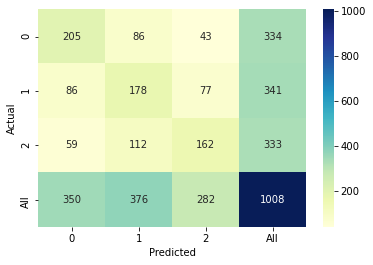

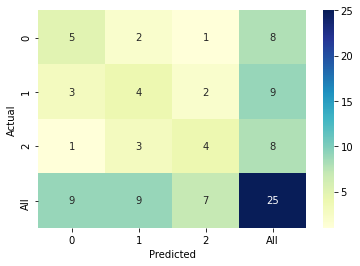

<Figure size 432x288 with 0 Axes>

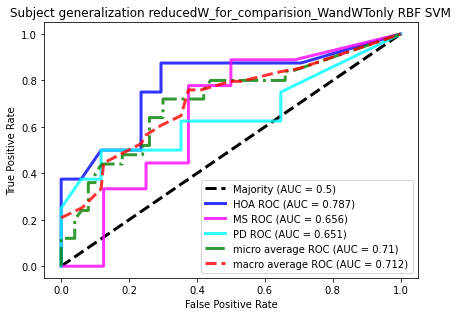

********************************
gbm
best_params:  {'gradientboostingclassifier__learning_rate': 0.15, 'gradientboostingclassifier__max_depth': 4, 'gradientboostingclassifier__max_features': 'auto', 'gradientboostingclassifier__min_samples_leaf': 1, 'gradientboostingclassifier__min_samples_split': 2, 'gradientboostingclassifier__n_estimators': 150}

Stride-based model performance (mean):  [0.5323321598038708, 0.5556489154836052, 0.5323321598038708, 0.5608506793533364, [0.5949185277559299, 0.5208377425044092, 0.5511904761904762], 0.5387929191323255, 0.5323321598038708, 0.5323321598038708, [0.6486788617886179, 0.44461538461538463, 0.5230845109929741], 0.5220228862837218, 0.5323321598038708, 0.5245621806242322, [0.5875066367662568, 0.4523158157088941, 0.5262462063760144], 0.7002434854580486, 0.694704663755046]

Stride-based model performance (standard deviation):  [0.11586255775322675, 0.12378604859018628, 0.11586255775322675, 0.1301277243206102, [0.15124754982201874, 0.18506949123911207,

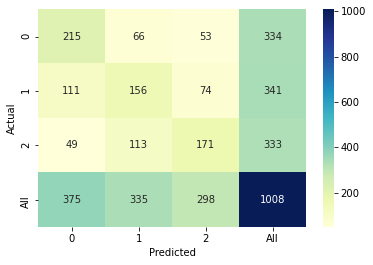

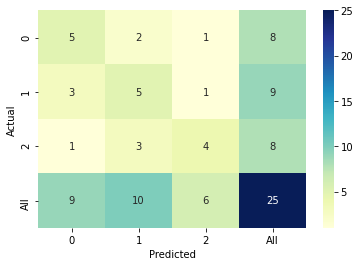

<Figure size 432x288 with 0 Axes>

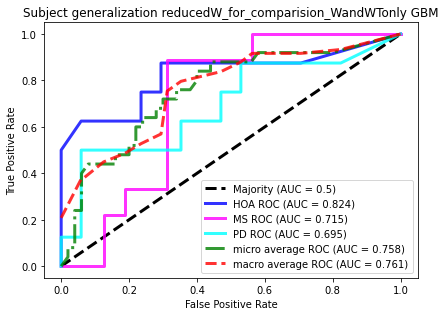

********************************
xgboost
best_params:  {'xgbclassifier__colsample_bytree': 1.0, 'xgbclassifier__gamma': 0.1, 'xgbclassifier__max_depth': 7, 'xgbclassifier__min_child_weight': 5, 'xgbclassifier__subsample': 0.6}

Stride-based model performance (mean):  [0.5252881129251532, 0.541958113601882, 0.5252881129251532, 0.5440120372528989, [0.5879761858681233, 0.49515863018705375, 0.5427395247504686], 0.5331594571944487, 0.5252881129251532, 0.5252881129251532, [0.645189701897019, 0.42671967975765446, 0.5275689899286725], 0.5181330022813965, 0.5252881129251532, 0.518055833452815, [0.588314140639722, 0.4368123728123728, 0.5292724933920947], 0.6922800725082324, 0.6874368149753785]

Stride-based model performance (standard deviation):  [0.12196708430343103, 0.12161382496087947, 0.12196708430343103, 0.12215381697348367, [0.13111067938723614, 0.13980213782491777, 0.25718981510855543], 0.14041328426261845, 0.12196708430343103, 0.12196708430343103, [0.24927289958330437, 0.153538487445701

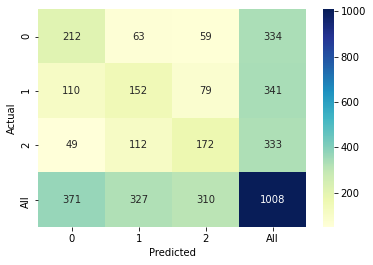

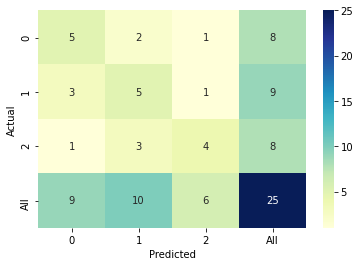

<Figure size 432x288 with 0 Axes>

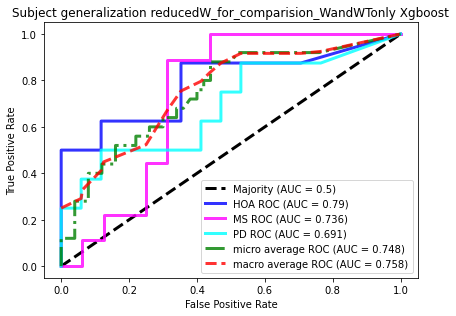

********************************
knn
best_params:  {'kneighborsclassifier__n_neighbors': 4, 'kneighborsclassifier__p': 2}

Stride-based model performance (mean):  [0.5272747835866627, 0.5282603509028048, 0.5272747835866627, 0.5457076373842186, [0.5449877489487772, 0.49763126276582964, 0.5421620409938075], 0.534341645910022, 0.5272747835866627, 0.5272747835866627, [0.6469173441734417, 0.48039164773341986, 0.47571594582320414], 0.5109700167857286, 0.5272747835866627, 0.5164141816163618, [0.5691726993044529, 0.48219277430385454, 0.48154457674887824], 0.6861154368666068, 0.6824891932223824]

Stride-based model performance (standard deviation):  [0.12700006860008367, 0.1426208226334288, 0.12700006860008367, 0.14950209816485735, [0.2006153957284914, 0.12080773065907903, 0.28646777156172354], 0.14557807191281816, 0.12700006860008367, 0.12700006860008367, [0.24203978846946084, 0.13081178054210038, 0.344337746993408], 0.139538251786436, 0.1270000686000837, 0.13261528666501987, [0.16952238664954

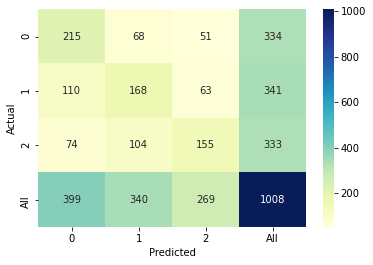

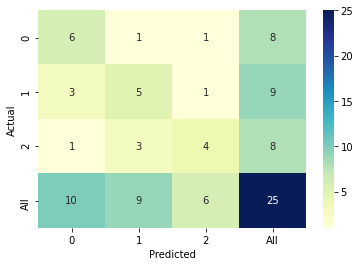

<Figure size 432x288 with 0 Axes>

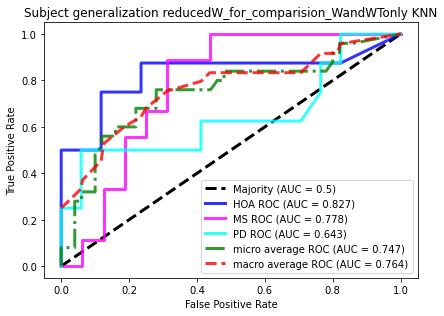

********************************
decision_tree
best_params:  {'decisiontreeclassifier__min_samples_split': 40}

Stride-based model performance (mean):  [0.49123072767231835, 0.49959651909602315, 0.49123072767231835, 0.5099547437389429, [0.5030083725798011, 0.4467335938986001, 0.549047590809668], 0.49639898051248615, 0.49123072767231835, 0.49123072767231835, [0.5463821138211382, 0.46830790868765554, 0.47450691902866454], 0.47539185870391903, 0.49123072767231835, 0.47862201642735663, [0.4850938306594044, 0.4504491845977914, 0.4906325608545614], 0.628753628386994, 0.6277634454547669]

Stride-based model performance (standard deviation):  [0.07651017859389378, 0.08562239067048769, 0.07651017859389378, 0.09884438703769799, [0.09083520155104885, 0.09321591301036843, 0.18892729498125885], 0.08885824250790302, 0.07651017859389378, 0.07651017859389378, [0.3200957015950932, 0.1523173652429792, 0.15963809688172534], 0.0854774788618978, 0.07651017859389378, 0.0840298643316544, [0.17555423189948938

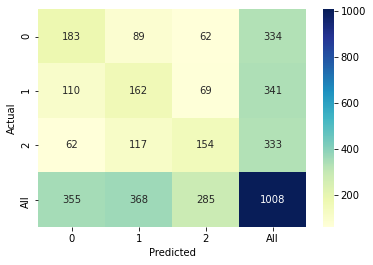

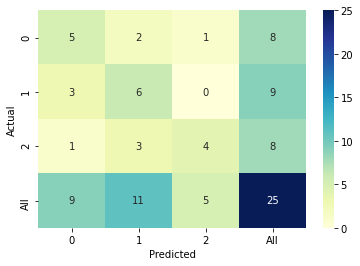

<Figure size 432x288 with 0 Axes>

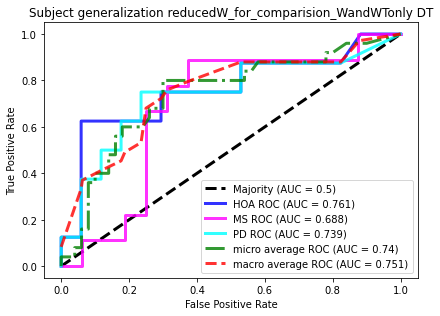

********************************
linear_svm
best_params:  {'svc__gamma': 0.0001}

Stride-based model performance (mean):  [0.5251655899665467, 0.5153978713680207, 0.5251655899665467, 0.5277355560912814, [0.5501885601067968, 0.46325161827299477, 0.5327534357242707], 0.5255813278501469, 0.5251655899665467, 0.5251655899665467, [0.5525609756097561, 0.5095337011792708, 0.5146493067614137], 0.5124970164727498, 0.5251655899665467, 0.5188198021647539, [0.5425350172134819, 0.4832607850001945, 0.5116952472045729], 0.6990243584841119, 0.6995805203224466]

Stride-based model performance (standard deviation):  [0.10306958547218502, 0.11060842224265037, 0.10306958547218502, 0.10917444171788128, [0.14917254789267698, 0.10502796102362992, 0.2427374442709244], 0.12345314872856979, 0.10306958547218502, 0.10306958547218502, [0.13388669062499628, 0.14344562754019755, 0.34464665448657283], 0.11323539419065284, 0.10306958547218502, 0.10264858706739939, [0.11449589671191748, 0.12176061176736998, 0.2820023058

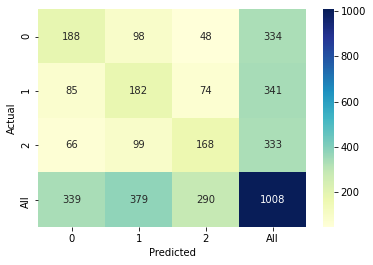

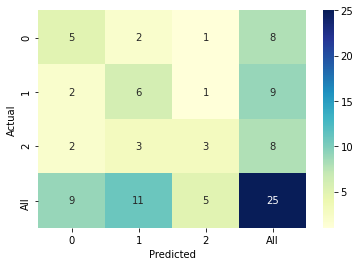

<Figure size 432x288 with 0 Axes>

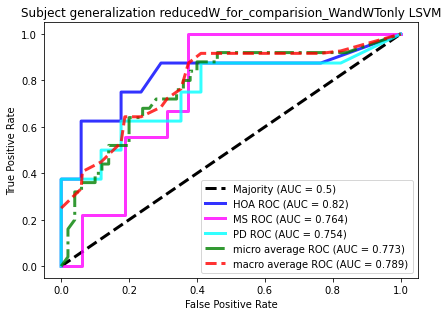

********************************
logistic_regression
best_params:  {'logisticregression__random_state': 0}

Stride-based model performance (mean):  [0.5355453724386157, 0.5338937698920609, 0.5355453724386157, 0.548060631079552, [0.6004062966490686, 0.4742300973879921, 0.5270449156391224], 0.537064303840687, 0.5355453724386157, 0.5355453724386157, [0.5647560975609757, 0.5145591258249487, 0.5318776881361366], 0.5257778447554406, 0.5355453724386157, 0.5330581420912381, [0.5724412296564196, 0.48924106964894226, 0.5156512349609603], 0.7075764597437616, 0.7080080879704471]

Stride-based model performance (standard deviation):  [0.11032662701696214, 0.11594956399171157, 0.11032662701696214, 0.12226952027637403, [0.20196978892617978, 0.09187564957258124, 0.21395518295720595], 0.12891029362221967, 0.11032662701696214, 0.11032662701696214, [0.1674448119098034, 0.09239495401779882, 0.3203022518061194], 0.11653123573454797, 0.11032662701696214, 0.11176447498507812, [0.16365861176287153, 0.07858713

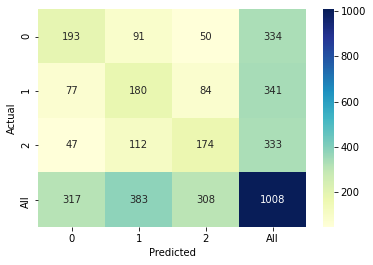

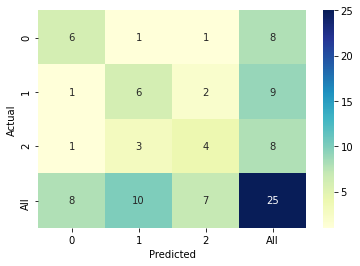

<Figure size 432x288 with 0 Axes>

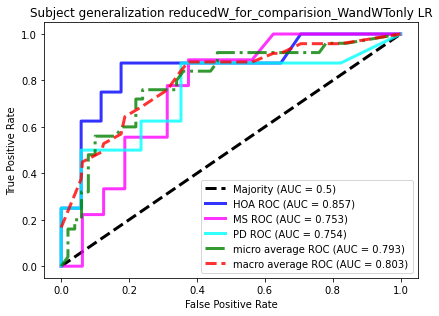

********************************
mlp
best_params:  {'mlpclassifier__hidden_layer_sizes': (50, 50, 5, 10, 5, 200, 200, 10)}

Stride-based model performance (mean):  [0.5406793780547868, 0.5545807626791941, 0.5406793780547868, 0.5575470640013712, [0.5458380030077492, 0.5314782286991909, 0.586426056330642], 0.5560709247719872, 0.5406793780547868, 0.5406793780547868, [0.6759214092140922, 0.5181131667207617, 0.4741781983811076], 0.5404328070034852, 0.5406793780547868, 0.5341935682147085, [0.5863488223817372, 0.5189571077778368, 0.5159924908508813], 0.7050445670177051, 0.7004042258636878]

Stride-based model performance (standard deviation):  [0.1171129761267288, 0.13852236898562661, 0.1171129761267288, 0.13878484240618372, [0.08008907165704669, 0.14529433507300202, 0.3085391595656161], 0.1361758806880076, 0.1171129761267288, 0.1171129761267288, [0.25264479094330716, 0.11474575548011322, 0.3011841520235493], 0.12869102397018828, 0.1171129761267288, 0.11732079852160672, [0.11030043227427601, 

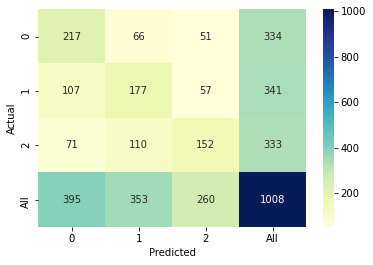

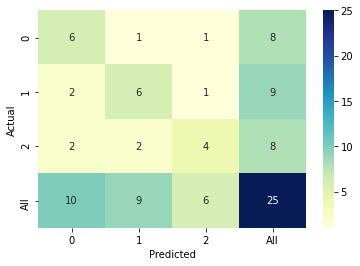

<Figure size 432x288 with 0 Axes>

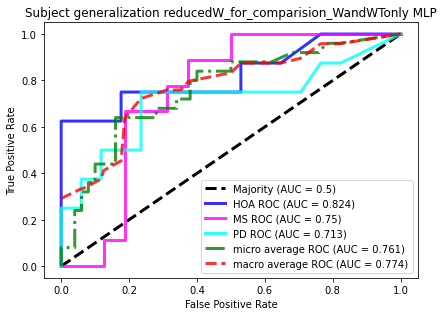

********************************


In [27]:
ml_models = ['random_forest', 'adaboost', 'kernel_svm', 'gbm', 'xgboost', 'knn', 'decision_tree',  'linear_svm', 
             'logistic_regression', 'mlp']
metrics_reducedW_for_comparision_WandWTonly = run_ml_models(ml_models, X_reduced_data_W, Y_reduced_data_W, framework, results_path, save_results)

In [28]:
metrics_reducedW_for_comparision_WandWTonly

random_forest  \
stride_accuracy_mean                                                       0.522855   
stride_precision_macro_mean                                                0.560069   
stride_precision_micro_mean                                                0.522855   
stride_precision_weighted_mean                                             0.568594   
stride_precision_class_wise_mean  [0.5262701356088872, 0.5651048502790034, 0.588...   
stride_recall_macro_mean                                                   0.528770   
stride_recall_micro_mean                                                   0.522855   
stride_recall_weighted_mean                                                0.522855   
stride_recall_class_wise_mean     [0.6649525745257452, 0.4464124202098886, 0.474...   
stride_F1_macro_mean                                                       0.511814   
stride_F1_micro_mean                                                       0.522855   
stride_F1_weighted_mean                                                    0.514788   
stride_F1_class_wise_mean         [0.5524025072051075, 0.47148952880933337, 0.51...   
stride_AUC_macro_mean                                                      0.680650   
stride_AUC_weighted_mean                                                   0.677907   
stride_accuracy_std                                                        0.216732   
stride_precision_macro_std                                                 0.231348   
stride_precision_micro_std                                                 0.216732   
stride_precision_weighted_std                                              0.235144   
stride_precision_class_wise_std   [0.19301526257743853, 0.30024563951552236, 0.3...   
stride_recall_macro_std                                                    0.227606   
stride_recall_micro_std                                                    0.216732   
stride_recall_weighted_std                                                 0.216732   
stride_recall_class_wise_std      [0.4061170552169636, 0.17345979799079045, 0.33...   
stride_F1_macro_std                                                        0.221255   
stride_F1_micro_std                                                        0.216732   
stride_F1_weighted_std                                                     0.215376   
stride_F1_class_wise_std          [0.2697423504345818, 0.18652238236128077, 0.32...   
stride_AUC_macro_std                                                       0.212301   
stride_AUC_weighted_std                                                    0.210534   
person_accuracy_mean                                                       0.566667   
person_precision_macro_mean                                                0.566667   
person_precision_micro_mean                                                0.566667   
person_precision_weighted_mean                                             0.675000   
person_precision_class_wise_mean                                    [0.7, 0.5, 0.5]   
person_recall_macro_mean                                                   0.577778   
person_recall_micro_mean                                                   0.566667   
person_recall_weighted_mean                                                0.566667   
person_recall_class_wise_mean                       [0.6, 0.43333333333333335, 0.7]   
person_F1_macro_mean                                                       0.540000   
person_F1_micro_mean                                                       0.566667   
person_F1_weighted_mean                                                    0.579444   
person_F1_class_wise_mean                                           [0.7, 0.5, 0.5]   
person_AUC_macro_mean                                                      0.650000   
person_AUC_weighted_mean                                                   0.651042   
person_accuracy_std                                                 

### Trial WT

In [29]:
#Running the traditional models again for all sub-frameworks of suject generalization to give a ranking of best to worst 
#tasks for subject generalization 

#Trial WT
reduced_data_WT = reduced_data[reduced_data.scenario=='WT'].reset_index().drop('index', axis = 1)
cols_to_drop = ['PID', 'key', 'cohort', 'trial', 'scenario', 'video', 'stride_number', 'label']

#Shuffling the cross validation stride data
reduced_data_WT = shuffle(reduced_data_WT, random_state = 0)
#CV for people generalize so no train-test split
X_reduced_data_WT = reduced_data_WT.drop(cols_to_drop, axis = 1)
Y_reduced_data_WT = reduced_data_WT[['PID', 'label']]

#Defining the framework of interest
framework = 'reducedWT_for_comparision_WandWTonly'

random_forest
best_params:  {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 50}

Stride-based model performance (mean):  [0.4984449169767819, 0.5210200320811929, 0.4984449169767819, 0.552685420655847, [0.36824190364947745, 0.5141676028562902, 0.6806505897378108], 0.4855776807110711, 0.4984449169767819, 0.4984449169767819, [0.42910527211750094, 0.5304531250149804, 0.49717464500073194], 0.46259884678712576, 0.4984449169767819, 0.4801308036993032, [0.3909177608881342, 0.5018617822850402, 0.4950169971882031], 0.6709688568573247, 0.6785956964401738]

Stride-based model performance (standard deviation):  [0.1584317362522666, 0.1263707228918657, 0.1584317362522666, 0.11191523630052273, [0.2932202952166864, 0.18291236298029817, 0.2709526406472948], 0.15565984419792284, 0.1584317362522666, 0.1584317362522666, [0.348871

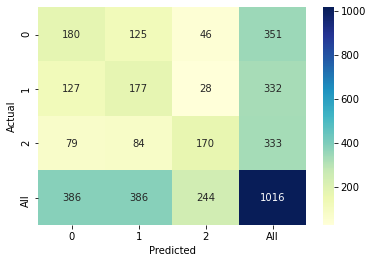

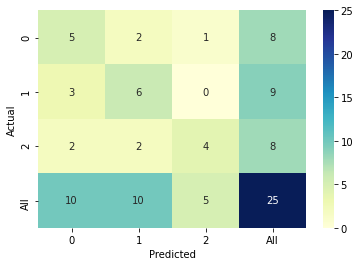

<Figure size 432x288 with 0 Axes>

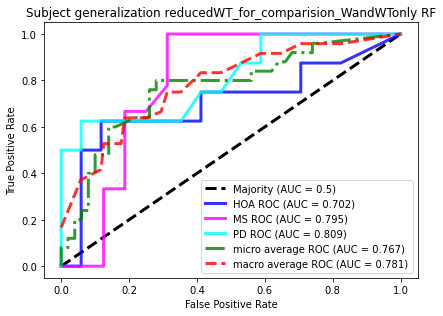

********************************
adaboost
best_params:  {'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 150}

Stride-based model performance (mean):  [0.4848951374359391, 0.4728691901760584, 0.4848951374359391, 0.5088370848385837, [0.3730993725375748, 0.4826039410915482, 0.5629042568990522], 0.46991872841698956, 0.4848951374359391, 0.4848951374359391, [0.44543635903844353, 0.46664501042176737, 0.4976748157907578], 0.4464474670870346, 0.4848951374359391, 0.4702773279868905, [0.4017668987290812, 0.452881897921268, 0.48469360461075456], 0.6539876675168446, 0.6621456280481179]

Stride-based model performance (standard deviation):  [0.051772920111691316, 0.09610530953096769, 0.051772920111691316, 0.10100989381565964, [0.2241439292096281, 0.20638164960804747, 0.3429966632625746], 0.06986774732599707, 0.051772920111691316, 0.051772920111691316, [0.293749693836357, 0.14673000866155503, 0.3249613134309789], 0.0819686792441719, 0.0517729201116913, 0.06852741982706405

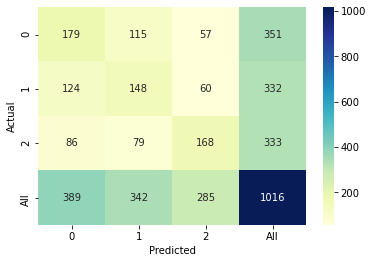

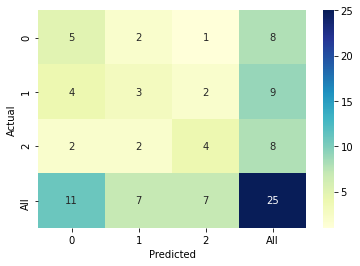

<Figure size 432x288 with 0 Axes>

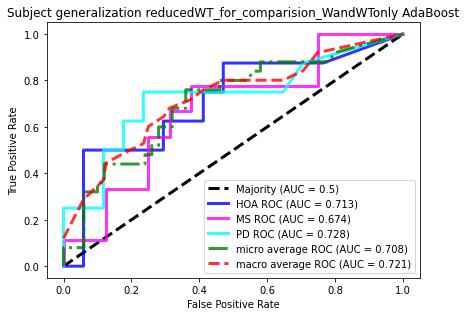

********************************
kernel_svm
best_params:  {'svc__gamma': 0.001}

Stride-based model performance (mean):  [0.46526801301359894, 0.5053021465396939, 0.46526801301359894, 0.5478245308857251, [0.40225083056478406, 0.5414914341660565, 0.5721641748882407], 0.4638368813114986, 0.46526801301359894, 0.46526801301359894, [0.3665864904349578, 0.518553685534867, 0.5063704679646709], 0.4262498565794354, 0.46526801301359894, 0.4379176054655131, [0.38192276025315935, 0.4626720677124396, 0.43415474177270735], 0.6623668667534208, 0.6721729525786696]

Stride-based model performance (standard deviation):  [0.19345946844061646, 0.15553105827573066, 0.19345946844061646, 0.13704371302787408, [0.3488983597130057, 0.3177487335013586, 0.3412200886501634], 0.18577122404957186, 0.19345946844061646, 0.19345946844061646, [0.34297385252086626, 0.22822935255708016, 0.4323043697774764], 0.21068281520004006, 0.1934594684406165, 0.20833523506553234, [0.3439975609053114, 0.19863274321728, 0.3195912597251

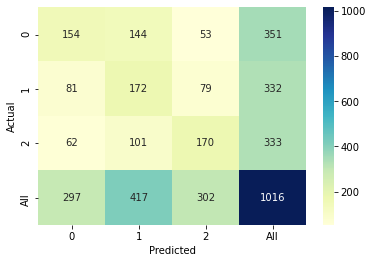

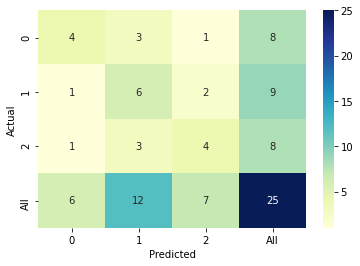

<Figure size 432x288 with 0 Axes>

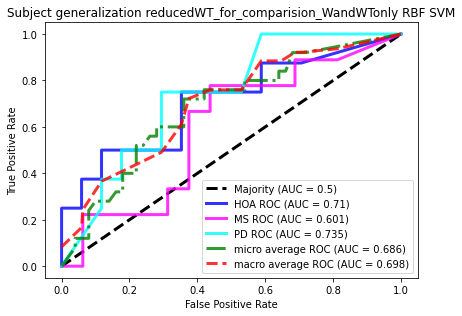

********************************
gbm
best_params:  {'gradientboostingclassifier__learning_rate': 0.05, 'gradientboostingclassifier__max_depth': 4, 'gradientboostingclassifier__max_features': 'auto', 'gradientboostingclassifier__min_samples_leaf': 3, 'gradientboostingclassifier__min_samples_split': 2, 'gradientboostingclassifier__n_estimators': 50}

Stride-based model performance (mean):  [0.5210100716449466, 0.5189403023968274, 0.5210100716449466, 0.5522603104721091, [0.4054689911027939, 0.5233784941607782, 0.6279734219269103], 0.5053294616487618, 0.5210100716449466, 0.5210100716449466, [0.46001997632071145, 0.5386478601456051, 0.5173205484799688], 0.48209080205579563, 0.5210100716449466, 0.5029244343106984, [0.4256621274328184, 0.5173382839331385, 0.5032719948014299], 0.6815886732938559, 0.6897459852367085]

Stride-based model performance (standard deviation):  [0.15185588925006616, 0.1385099889918966, 0.15185588925006616, 0.12340504809294098, [0.29942436444116566, 0.21035634586442611

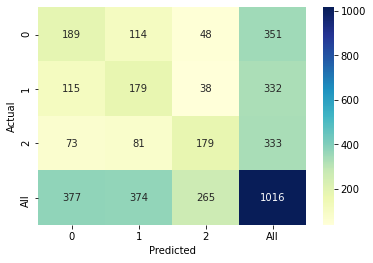

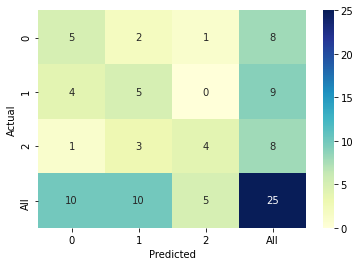

<Figure size 432x288 with 0 Axes>

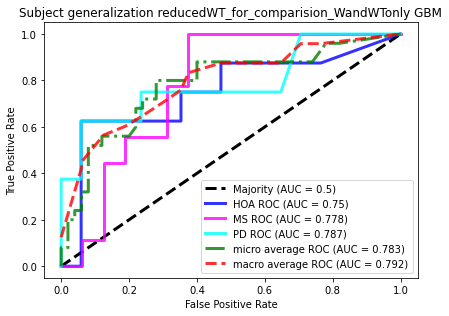

********************************
xgboost
best_params:  {'xgbclassifier__colsample_bytree': 1.0, 'xgbclassifier__gamma': 0.1, 'xgbclassifier__max_depth': 8, 'xgbclassifier__min_child_weight': 5, 'xgbclassifier__subsample': 0.6}

Stride-based model performance (mean):  [0.5339388995068761, 0.5279231233763731, 0.5339388995068761, 0.568425689468169, [0.39738117923881716, 0.5788059948605258, 0.6075821960297767], 0.5156475039098034, 0.5339388995068761, 0.5339388995068761, [0.4539252963879506, 0.5626531886006211, 0.5303640267408384], 0.4959670535461222, 0.533938899506876, 0.5219096441092314, [0.4185755667854618, 0.5509098782018275, 0.5184157156510775], 0.6761731218479101, 0.6869500573021625]

Stride-based model performance (standard deviation):  [0.1366562293698915, 0.130859412467281, 0.1366562293698915, 0.1105824086094827, [0.3066160497320305, 0.22764299054920586, 0.35948331501146386], 0.14369928537323587, 0.1366562293698915, 0.1366562293698915, [0.3534657912317135, 0.11098693824341115, 0.36

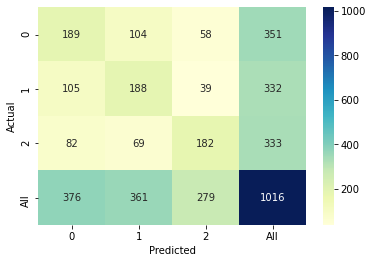

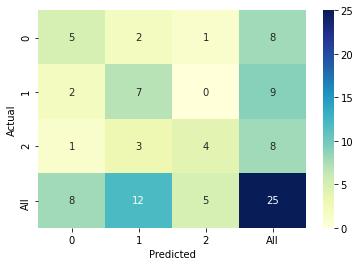

<Figure size 432x288 with 0 Axes>

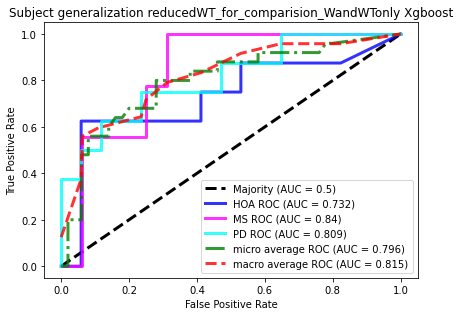

********************************
knn
best_params:  {'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__p': 4}

Stride-based model performance (mean):  [0.4941734106879057, 0.5302609579060046, 0.4941734106879057, 0.5698018468020811, [0.38426314478827606, 0.5859168609168609, 0.6206028680128768], 0.48615549947870884, 0.4941734106879057, 0.4941734106879057, [0.4612612767396917, 0.4984373497401572, 0.49876787195627775], 0.4642918421556942, 0.4941734106879057, 0.48041188196646534, [0.41695125546286044, 0.5002187782349125, 0.4757054927693098], 0.6766190308279385, 0.6833037004193173]

Stride-based model performance (standard deviation):  [0.15340635767713626, 0.129940555957422, 0.15340635767713626, 0.10805045453317506, [0.27086737420824625, 0.2930428325772831, 0.32926721474309056], 0.1508175732404969, 0.15340635767713626, 0.15340635767713626, [0.3500637362816362, 0.08699105483215862, 0.3751492911084116], 0.16782474772597122, 0.15340635767713626, 0.1597515859655396, [0.304374333171

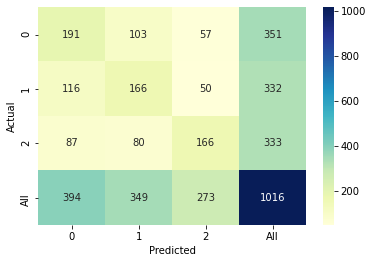

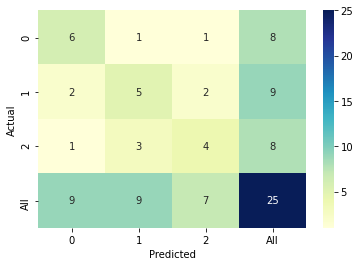

<Figure size 432x288 with 0 Axes>

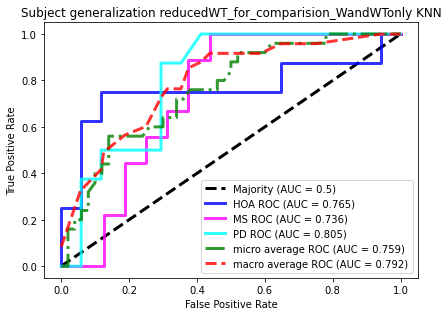

********************************
decision_tree
best_params:  {'decisiontreeclassifier__min_samples_split': 5}

Stride-based model performance (mean):  [0.5320714881297504, 0.5264732971350107, 0.5320714881297504, 0.5531525261189864, [0.41135656513746566, 0.532306510619446, 0.63575681564812], 0.5162532135164717, 0.5320714881297504, 0.5320714881297504, [0.4841715744630539, 0.5647466568246622, 0.4998414092616991], 0.4921094369166802, 0.5320714881297504, 0.5103703713631711, [0.43450620538403717, 0.5274256405922914, 0.514396464773712], 0.6379013368721344, 0.6411453090873035]

Stride-based model performance (standard deviation):  [0.10922361729020909, 0.09214484511256665, 0.10922361729020909, 0.07706918558081557, [0.203003095892825, 0.14411645429771355, 0.25018136121617024], 0.10552806020545563, 0.10922361729020909, 0.10922361729020909, [0.3334522708781206, 0.10534580781828146, 0.34356760645264295], 0.12243035018120978, 0.10922361729020909, 0.11510461189346415, [0.2623885185491158, 0.08535046

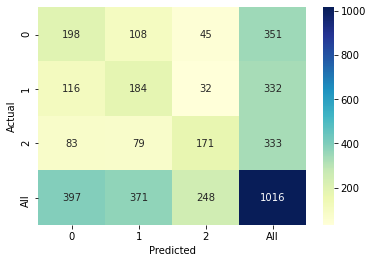

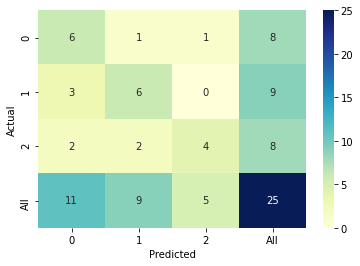

<Figure size 432x288 with 0 Axes>

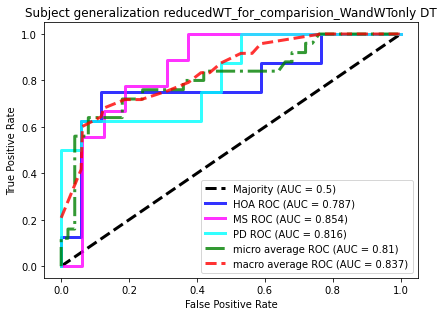

********************************
linear_svm
best_params:  {'svc__gamma': 0.0001}

Stride-based model performance (mean):  [0.4962015290378476, 0.5073439169870425, 0.4962015290378476, 0.5368582927875936, [0.37972984340189037, 0.5543723556296852, 0.587929551929552], 0.4795620422408997, 0.4962015290378476, 0.4962015290378476, [0.43399544634711146, 0.4983177725534045, 0.5063729078221831], 0.45991298179571355, 0.4962015290378476, 0.48125331781562836, [0.3962670758797612, 0.500477411268148, 0.4829944582392314], 0.6397035517553942, 0.6500398771951025]

Stride-based model performance (standard deviation):  [0.13571309395522646, 0.10464942240045899, 0.13571309395522646, 0.07998973352361169, [0.27003614089820244, 0.2749513651765785, 0.17735166917241826], 0.12643519611074144, 0.13571309395522646, 0.13571309395522646, [0.3568369685704384, 0.05964597271967888, 0.3651745059207117], 0.1315949081263261, 0.13571309395522646, 0.12764523164645147, [0.29426793807471974, 0.1508332404094223, 0.2459145348083

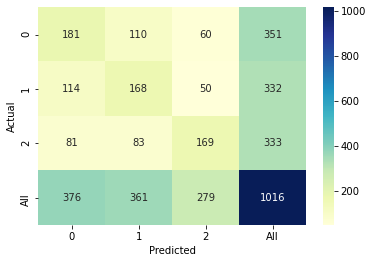

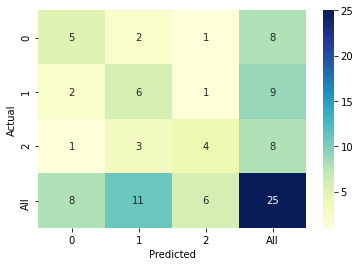

<Figure size 432x288 with 0 Axes>

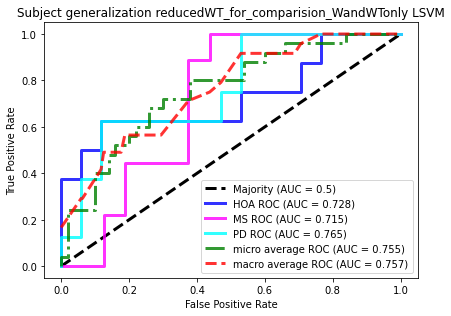

********************************
logistic_regression
best_params:  {'logisticregression__random_state': 0}

Stride-based model performance (mean):  [0.46334833945790965, 0.47576313170840584, 0.46334833945790965, 0.5073861199756193, [0.3870568115285786, 0.5036163836163836, 0.5366161999802553], 0.4486331160692486, 0.46334833945790965, 0.46334833945790965, [0.40282882812281723, 0.4210947234714509, 0.5219757966134777], 0.43210868563961125, 0.46334833945790965, 0.45225057198676755, [0.38366814209844147, 0.42818868961464135, 0.48446922520575086], 0.6281509641432648, 0.6377955144480467]

Stride-based model performance (standard deviation):  [0.1098764557760927, 0.07693189808242046, 0.1098764557760927, 0.05355266609877225, [0.2520283045172331, 0.2654668729813248, 0.19876789271981116], 0.10649733132339308, 0.1098764557760927, 0.1098764557760927, [0.31912961111995347, 0.06799614411251594, 0.3418508898311374], 0.10831167421556862, 0.1098764557760927, 0.10037647353613138, [0.2616803622716948, 0.12

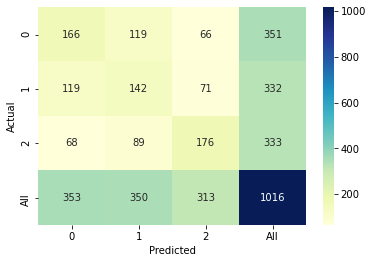

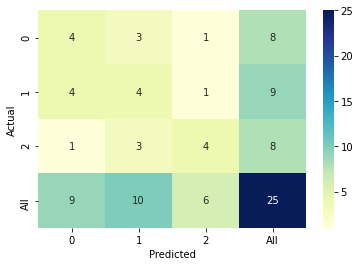

<Figure size 432x288 with 0 Axes>

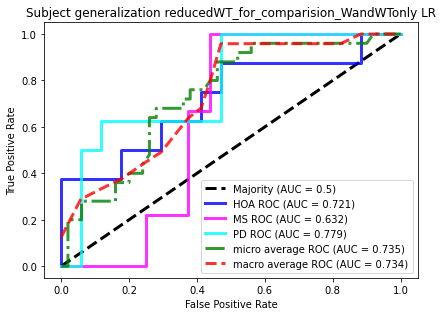

********************************
mlp
best_params:  {'mlpclassifier__hidden_layer_sizes': (50, 50, 50, 50, 50, 5, 30, 50, 20)}

Stride-based model performance (mean):  [0.5278632953667712, 0.5248897234212615, 0.5278632953667712, 0.5658699743566976, [0.39127373692797346, 0.6276385675727781, 0.555756865763033], 0.5071421412062511, 0.5278632953667712, 0.5278632953667712, [0.46667716251403324, 0.46482099291558254, 0.5899282681891378], 0.48613614868113697, 0.5278632953667712, 0.514578773845229, [0.4228988731726223, 0.5037267218541066, 0.5317828510166819], 0.6893546317728312, 0.697610698916195]

Stride-based model performance (standard deviation):  [0.12626215567434754, 0.1171222533003132, 0.12626215567434754, 0.08599325685546044, [0.3033515328417267, 0.28678529675487563, 0.3137215883851808], 0.12817152880168972, 0.12626215567434754, 0.12626215567434754, [0.3890688191403346, 0.09544862017592795, 0.36694670893411185], 0.13882271373018537, 0.12626215567434754, 0.12453016375614614, [0.3418108904

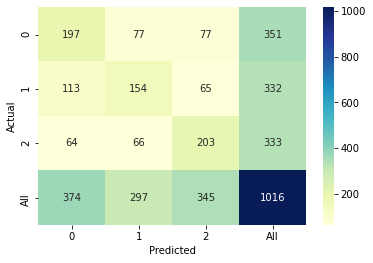

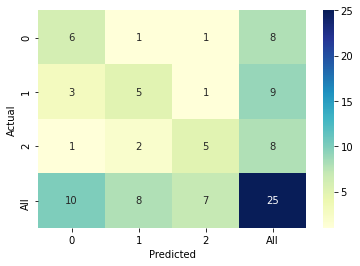

<Figure size 432x288 with 0 Axes>

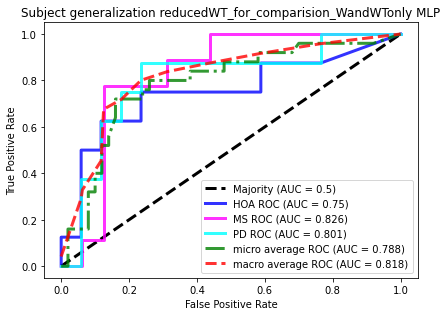

********************************


In [30]:
ml_models = ['random_forest', 'adaboost', 'kernel_svm', 'gbm', 'xgboost', 'knn', 'decision_tree',  'linear_svm', 
             'logistic_regression', 'mlp']
metrics_reducedWT_for_comparision_WandWTonly = run_ml_models(ml_models, X_reduced_data_WT, Y_reduced_data_WT, framework, results_path, save_results)

In [31]:
metrics_reducedWT_for_comparision_WandWTonly

random_forest  \
stride_accuracy_mean                                                       0.498445   
stride_precision_macro_mean                                                0.521020   
stride_precision_micro_mean                                                0.498445   
stride_precision_weighted_mean                                             0.552685   
stride_precision_class_wise_mean  [0.36824190364947745, 0.5141676028562902, 0.68...   
stride_recall_macro_mean                                                   0.485578   
stride_recall_micro_mean                                                   0.498445   
stride_recall_weighted_mean                                                0.498445   
stride_recall_class_wise_mean     [0.42910527211750094, 0.5304531250149804, 0.49...   
stride_F1_macro_mean                                                       0.462599   
stride_F1_micro_mean                                                       0.498445   
stride_F1_weighted_mean                                                    0.480131   
stride_F1_class_wise_mean         [0.3909177608881342, 0.5018617822850402, 0.495...   
stride_AUC_macro_mean                                                      0.670969   
stride_AUC_weighted_mean                                                   0.678596   
stride_accuracy_std                                                        0.158432   
stride_precision_macro_std                                                 0.126371   
stride_precision_micro_std                                                 0.158432   
stride_precision_weighted_std                                              0.111915   
stride_precision_class_wise_std   [0.2932202952166864, 0.18291236298029817, 0.27...   
stride_recall_macro_std                                                    0.155660   
stride_recall_micro_std                                                    0.158432   
stride_recall_weighted_std                                                 0.158432   
stride_recall_class_wise_std      [0.3488711233625071, 0.07132833554541189, 0.38...   
stride_F1_macro_std                                                        0.171574   
stride_F1_micro_std                                                        0.158432   
stride_F1_weighted_std                                                     0.164343   
stride_F1_class_wise_std          [0.30998647203302415, 0.12263450590220344, 0.3...   
stride_AUC_macro_std                                                       0.142183   
stride_AUC_weighted_std                                                    0.135079   
person_accuracy_mean                                                       0.570000   
person_precision_macro_mean                                                0.566667   
person_precision_micro_mean                                                0.570000   
person_precision_weighted_mean                                             0.805000   
person_precision_class_wise_mean                                    [0.5, 0.7, 0.5]   
person_recall_macro_mean                                                   0.538889   
person_recall_micro_mean                                                   0.570000   
person_recall_weighted_mean                                                0.570000   
person_recall_class_wise_mean                      [0.36666666666666664, 0.75, 0.5]   
person_F1_macro_mean                                                       0.508889   
person_F1_micro_mean                                                       0.570000   
person_F1_weighted_mean                                                    0.608889   
person_F1_class_wise_mean                                           [0.5, 0.7, 0.5]   
person_AUC_macro_mean                                                      0.733333   
person_AUC_weighted_mean                                                   0.748125   
person_accuracy_std                                                 